<a href="https://colab.research.google.com/github/Acr4ia/CoderHouse-entregas/blob/main/ProyectoParteIII%2BContreras%2C_Sergio_Ciencia_de_datos_I_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega No. 1
## Sergio Contreras Vélez
### Ciencia de Datos 1 - Comisión 74235


El dataset elegido es una mezcla de datos del Centro Nacional de Memoria Histórica de Colombia, el cual trata sobre diferentes registros de victimización en el conflicto armado en el país. Los temas seleccionados son masacres, acciones bélicas y asesinatos selectivos. Los registros son publicados anualmente y consolidados en la página del CNMH.

El objetivo de este proyecto es analizar tendencias de los datos que sean relevantes para el diseño de política pública en el país en materia de diálogos entre actores armados.

Las hipótesis inicialmente son:

1. Concentración territorial: "El 60% de los eventos violentos se concentra en el 20% de los municipios, correlacionados con zonas de economías ilegales (minería, narcotráfico)."
2. Acuerdos de paz: "Los homicidios a líderes sociales aumentaron en el primer año post-acuerdo (2017 vs 2016)."
3. Capturas preventivas: "Los municipios con operativos de captura (CAPTURADOS >0) reducen un 20% los eventos violentos en los 3 meses siguientes."
4. Perfil de eventos masivos: "Los casos con >10 víctimas (TOTAL_DE_VICTIMAS_DEL_CASO ≥10) ocurren principalmente en zonas rurales (MUNICIPIO pequeño) con presencia de 2+ grupos armados."
5. Triple victimización: "Los municipios con alta tasa de desplazamiento (MODALIDAD= 'DESPLAZAMIENTO') también presentan mayor reclutamiento forzado y minas antipersonal."
6. "Los combates con múltiples grupos armados (3 actores) dejan 50% más víctimas civiles que enfrentamientos bilaterales"
7. "Las fuerzas estatales sufren más bajas en emboscadas (iniciativa GAO) que en operativos proactivos"




In [48]:
## Proyecto de Ciencia de Datos - Análisis CNMH
### Configuración inicial
# Instalación de paquetes necesarios
!pip install pandas numpy matplotlib seaborn openpyxl
!apt-get install -y locales
!locale-gen es_ES.UTF-8

# Configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import locale
import os

# Configurar visualizaciones
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Generating locales (this might take a while)...
  es_ES.UTF-8... done
Generation complete.


In [49]:
## Carga de datos
from google.colab import files

def cargar_datos():
    # Subir archivo
    uploaded = files.upload()
    filename = next(iter(uploaded))

    # Cargar datos
    try:
        df = pd.read_excel(filename, sheet_name=0, engine='openpyxl')
        print(f"Dataset cargado correctamente. Dimensiones: {df.shape}")
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {str(e)}")
        return None

# Ejecutar carga de datos
print("Por favor, sube tu archivo datasetCNMH.xlsx")
df = cargar_datos()

if df is not None:
    display(df.head(3))

Por favor, sube tu archivo datasetCNMH.xlsx


Saving datasetCNMH.xlsx to datasetCNMH (1).xlsx
Dataset cargado correctamente. Dimensiones: (38907, 40)


ID Caso ID Caso Relacionado   Año  Mes  Día Código DANE de Municipio  \
0        1            CR000497  2006    3   12                    27073   
1       10            CR080150     0    0    0                    00000   
2      100                 NaN     0    0    0                    05854   

         Municipio     Departamento              Región  \
0           BAGADO            CHOCO              ATRATO   
1  SIN INFORMACION  SIN INFORMACION     SIN INFORMACION   
2         VALDIVIA        ANTIOQUIA  NORTE DE ANTIOQUIA   

                                           Modalidad  \
0                        COMBATE Y/O CONTACTO ARMADO   
1                                  OPERACIÓN MILITAR   
2  COMBATIENTE MUERTO EN CIRCUNSTANCIA NO DETERMI...   

                   Iniciativa Tipo de Unidad Atacada     Grupo Armado 1  \
0  GRUPOS ARMADOS ORGANIZADOS        SIN INFORMACIÓN  AGENTE DEL ESTADO   
1   FUERZAS ARMADAS ESTATALES        SIN INFORMACIÓN  AGENTE DEL ESTADO   
2  GRUPOS ARMADOS ORGANIZADOS        SIN INFORMACIÓN  GRUPO PARAMILITAR   

  Descripción Grupo Armado 1     Grupo Armado 2 Descripción Grupo Armado 2  \
0          EJÉRCITO NACIONAL          GUERRILLA                       FARC   
1          EJÉRCITO NACIONAL          GUERRILLA                       FARC   
2            NO IDENTIFICADO  GRUPO PARAMILITAR            NO IDENTIFICADO   

  Grupo Armado 3 Descripción Grupo Armado 3  Lesionados Civiles  \
0            NaN                        NaN                   6   
1            NaN                        NaN                   0   
2            NaN                        NaN                   0   

  Grupo al que Pertenecen los Capturados  Capturados  Lesionados Combatientes  \
0                                    NaN           0                        0   
1                                    NaN           0                        0   
2                                    NaN           0                        0   

   Militares  Policías  Otras Fuerzas Armadas Estatales  \
0          0         0                                0   
1          0         0                                0   
2          0         0                                0   

   Agentes del Estado Sin Información  Total Agentes del Estado  Guerrilleros  \
0                                   0                         0             0   
1                                   0                         0             1   
2                                   0                         0             0   

   Paramilitares  Grupos Posdesmovilización  Combatientes Sin Información  \
0              0                          0                             0   
1              0                          0                             0   
2              2                          0                             0   

   Otros Grupos Armados Organizados  \
0                                 0   
1                                 0   
2                                 0   

   Total Combatientes de Grupos Armados Organizados  Total Combatientes  \
0                                                 0                   0   
1                                                 1                   1   
2                                                 2                   2   

   Personas Sin Información  Total Civiles             Ventaja Militar  \
0                         0              1  GRUPOS ARMADOS ORGANIZADOS   
1                         0              0   FUERZAS ARMADAS ESTATALES   
2                         0              0  GRUPOS ARMADOS ORGANIZADOS   

   Total de Víctimas del Caso   Latitud   Longitud  
0                           1  5.503120 -76.197969  
1                           1  4.000000 -72.000000  
2                           2  7.265404 -75.400945

In [50]:

## Limpieza y preparación de datos
def limpiar_datos(df):
    df_clean = df.copy()

    # 1. Eliminar filas totalmente vacías y columnas sin nombre
    df_clean = df_clean.dropna(how='all')
    df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed')]

    # 2. Normalizar nombres de columnas
    df_clean.columns = (
        df_clean.columns.str.strip()
        .str.upper()
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

    # 3. Manejar grupos armados
    cols_grupos = ['GRUPO_ARMADO_1', 'GRUPO_ARMADO_2', 'GRUPO_ARMADO_3']
    for col in cols_grupos:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('NO_APLICA')

    if all(col in df_clean.columns for col in cols_grupos):
        df_clean['TODOS_GRUPOS'] = df_clean[cols_grupos].apply(
            lambda x: '|'.join(filter(None, x.astype(str))), axis=1)

    # 4. Manejar valores numéricos
    cols_numericas = ['LESIONADOS_CIVILES', 'CAPTURADOS', 'TOTAL_DE_VÍCTIMAS_DEL_CASO']
    for col in cols_numericas:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

    # 5. Manejar fechas
    if all(col in df_clean.columns for col in ['AÑO', 'MES', 'DÍA']):
        df_clean['FECHA'] = pd.to_datetime(
            df_clean['AÑO'].astype(str) + '-' +
            df_clean['MES'].astype(str).str.zfill(2) + '-' +
            df_clean['DÍA'].astype(str).str.zfill(2),
            errors='coerce'
        )
        df_clean = df_clean[df_clean['FECHA'].notna()].copy()
        df_clean['AÑO'] = df_clean['FECHA'].dt.year
        df_clean['MES'] = df_clean['FECHA'].dt.month_name()
        df_clean['TRIMESTRE'] = df_clean['FECHA'].dt.quarter
        df_clean['SEMANA'] = df_clean['FECHA'].dt.isocalendar().week

    print("Datos limpiados y preparados")
    return df_clean

# Limpiar datos
df_clean = limpiar_datos(df) if df is not None else None

if df_clean is not None:
    display(df_clean.head(3))
    print("\nColumnas disponibles:", df_clean.columns.tolist())

Datos limpiados y preparados


ID_CASO ID_CASO_RELACIONADO   ANO  MES  DIA CODIGO_DANE_DE_MUNICIPIO  \
0        1            CR000497  2006    3   12                    27073   
1       10            CR080150     0    0    0                    00000   
2      100                 NaN     0    0    0                    05854   

         MUNICIPIO     DEPARTAMENTO              REGION  \
0           BAGADO            CHOCO              ATRATO   
1  SIN INFORMACION  SIN INFORMACION     SIN INFORMACION   
2         VALDIVIA        ANTIOQUIA  NORTE DE ANTIOQUIA   

                                           MODALIDAD  \
0                        COMBATE Y/O CONTACTO ARMADO   
1                                  OPERACIÓN MILITAR   
2  COMBATIENTE MUERTO EN CIRCUNSTANCIA NO DETERMI...   

                   INICIATIVA TIPO_DE_UNIDAD_ATACADA     GRUPO_ARMADO_1  \
0  GRUPOS ARMADOS ORGANIZADOS        SIN INFORMACIÓN  AGENTE DEL ESTADO   
1   FUERZAS ARMADAS ESTATALES        SIN INFORMACIÓN  AGENTE DEL ESTADO   
2  GRUPOS ARMADOS ORGANIZADOS        SIN INFORMACIÓN  GRUPO PARAMILITAR   

  DESCRIPCION_GRUPO_ARMADO_1     GRUPO_ARMADO_2 DESCRIPCION_GRUPO_ARMADO_2  \
0          EJÉRCITO NACIONAL          GUERRILLA                       FARC   
1          EJÉRCITO NACIONAL          GUERRILLA                       FARC   
2            NO IDENTIFICADO  GRUPO PARAMILITAR            NO IDENTIFICADO   

  GRUPO_ARMADO_3 DESCRIPCION_GRUPO_ARMADO_3  LESIONADOS_CIVILES  \
0      NO_APLICA                        NaN                   6   
1      NO_APLICA                        NaN                   0   
2      NO_APLICA                        NaN                   0   

  GRUPO_AL_QUE_PERTENECEN_LOS_CAPTURADOS  CAPTURADOS  LESIONADOS_COMBATIENTES  \
0                                    NaN           0                        0   
1                                    NaN           0                        0   
2                                    NaN           0                        0   

   MILITARES  POLICIAS  OTRAS_FUERZAS_ARMADAS_ESTATALES  \
0          0         0                                0   
1          0         0                                0   
2          0         0                                0   

   AGENTES_DEL_ESTADO_SIN_INFORMACION  TOTAL_AGENTES_DEL_ESTADO  GUERRILLEROS  \
0                                   0                         0             0   
1                                   0                         0             1   
2                                   0                         0             0   

   PARAMILITARES  GRUPOS_POSDESMOVILIZACION  COMBATIENTES_SIN_INFORMACION  \
0              0                          0                             0   
1              0                          0                             0   
2              2                          0                             0   

   OTROS_GRUPOS_ARMADOS_ORGANIZADOS  \
0                                 0   
1                                 0   
2                                 0   

   TOTAL_COMBATIENTES_DE_GRUPOS_ARMADOS_ORGANIZADOS  TOTAL_COMBATIENTES  \
0                                                 0                   0   
1                                                 1                   1   
2                                                 2                   2   

   PERSONAS_SIN_INFORMACION  TOTAL_CIVILES             VENTAJA_MILITAR  \
0                         0              1  GRUPOS ARMADOS ORGANIZADOS   
1                         0              0   FUERZAS ARMADAS ESTATALES   
2                         0              0  GRUPOS ARMADOS ORGANIZADOS   

   TOTAL_DE_VICTIMAS_DEL_CASO   LATITUD   LONGITUD  \
0                           1  5.503120 -76.197969   
1                           1  4.000000 -72.000000   
2                           2  7.265404 -75.400945   

                                    TODOS_GRUPOS  
0          AGENTE DEL ESTADO|GUERRILLA|NO_APLICA  
1          AGENTE DEL ESTADO|GUERRILLA|NO_APLICA  
2  GRUPO PARAMILITAR|GRUPO PARAMILIT


Columnas disponibles: ['ID_CASO', 'ID_CASO_RELACIONADO', 'ANO', 'MES', 'DIA', 'CODIGO_DANE_DE_MUNICIPIO', 'MUNICIPIO', 'DEPARTAMENTO', 'REGION', 'MODALIDAD', 'INICIATIVA', 'TIPO_DE_UNIDAD_ATACADA', 'GRUPO_ARMADO_1', 'DESCRIPCION_GRUPO_ARMADO_1', 'GRUPO_ARMADO_2', 'DESCRIPCION_GRUPO_ARMADO_2', 'GRUPO_ARMADO_3', 'DESCRIPCION_GRUPO_ARMADO_3', 'LESIONADOS_CIVILES', 'GRUPO_AL_QUE_PERTENECEN_LOS_CAPTURADOS', 'CAPTURADOS', 'LESIONADOS_COMBATIENTES', 'MILITARES', 'POLICIAS', 'OTRAS_FUERZAS_ARMADAS_ESTATALES', 'AGENTES_DEL_ESTADO_SIN_INFORMACION', 'TOTAL_AGENTES_DEL_ESTADO', 'GUERRILLEROS', 'PARAMILITARES', 'GRUPOS_POSDESMOVILIZACION', 'COMBATIENTES_SIN_INFORMACION', 'OTROS_GRUPOS_ARMADOS_ORGANIZADOS', 'TOTAL_COMBATIENTES_DE_GRUPOS_ARMADOS_ORGANIZADOS', 'TOTAL_COMBATIENTES', 'PERSONAS_SIN_INFORMACION', 'TOTAL_CIVILES', 'VENTAJA_MILITAR', 'TOTAL_DE_VICTIMAS_DEL_CASO', 'LATITUD', 'LONGITUD', 'TODOS_GRUPOS']


In [51]:
## Análisis Exploratorio de Datos (EDA)
def eda_analysis(df):
    if df is None:
        return

    print("\n Valores faltantes por columna:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    display(pd.concat([missing, missing_percent], axis=1,
             keys=['Total', 'Porcentaje']).sort_values('Porcentaje', ascending=False).head(10))

    print("\n Estadísticas descriptivas:")
    display(df.describe(include='all'))

    if 'DEPARTAMENTO' in df.columns:
        print("\n Top 10 departamentos con más eventos:")
        display(df['DEPARTAMENTO'].value_counts().head(10))

    if 'AÑO' in df.columns:
        print("\n Distribución por año:")
        display(df['AÑO'].value_counts().sort_index())

# Ejecutar EDA
eda_analysis(df_clean)


 Valores faltantes por columna:


Total  Porcentaje
DESCRIPCION_GRUPO_ARMADO_3              37857   97.301257
GRUPO_AL_QUE_PERTENECEN_LOS_CAPTURADOS  36215   93.080937
ID_CASO_RELACIONADO                     34667   89.102218
REGION                                    644    1.655229
TIPO_DE_UNIDAD_ATACADA                    279    0.717095
DESCRIPCION_GRUPO_ARMADO_1                 18    0.046264
DESCRIPCION_GRUPO_ARMADO_2                  4    0.010281
MES                                         0    0.000000
ID_CASO                                     0    0.000000
DEPARTAMENTO                                0    0.000000


 Estadísticas descriptivas:


ID_CASO ID_CASO_RELACIONADO           ANO           MES  \
count    38907.000000                4240  38907.000000  38907.000000   
unique            NaN                3591           NaN           NaN   
top               NaN            CR040109           NaN           NaN   
freq              NaN                   4           NaN           NaN   
mean    107311.259208                 NaN   1988.584291      6.230832   
std     222200.724093                 NaN    150.522670      3.375762   
min          1.000000                 NaN      0.000000      0.000000   
25%      10267.500000                 NaN   1994.000000      3.000000   
50%      20481.000000                 NaN   2002.000000      6.000000   
75%      30717.500000                 NaN   2009.000000      9.000000   
max     950877.000000                 NaN   2025.000000     12.000000   

                 DIA CODIGO_DANE_DE_MUNICIPIO        MUNICIPIO DEPARTAMENTO  \
count   38907.000000                    38907            38907        38907   
unique           NaN                     1037              934           35   
top              NaN                    05001  SIN INFORMACION    ANTIOQUIA   
freq             NaN                      798              837         6835   
mean       15.370550                      NaN              NaN          NaN   
std         9.019642                      NaN              NaN          NaN   
min         0.000000                      NaN              NaN          NaN   
25%         8.000000                      NaN              NaN          NaN   
50%        15.000000                      NaN              NaN          NaN   
75%        23.000000                      NaN              NaN          NaN   
max        31.000000                      NaN              NaN          NaN   

                  REGION                    MODALIDAD  \
count              38263                        38907   
unique                78                           11   
top     ARIARI GUAYABERO  COMBATE Y/O CONTACTO ARMADO   
freq                2746                        21273   
mean                 NaN                          NaN   
std                  NaN                          NaN   
min                  NaN                          NaN   
25%                  NaN                          NaN   
50%                  NaN                          NaN   
75%                  NaN                          NaN   
max                  NaN                          NaN   

                       INICIATIVA TIPO_DE_UNIDAD_ATACADA     GRUPO_ARMADO_1  \
count                       38907                  38628              38907   
unique                          5                      5                 12   
top     FUERZAS ARMADAS ESTATALES        SIN INFORMACIÓN  AGENTE DEL ESTADO   
freq                        13204                  22832              36123   
mean                          NaN                    NaN                NaN   
std                           NaN                    NaN                NaN   
min                           NaN                    NaN                NaN   
25%                           NaN                    NaN                NaN   
50%                           NaN                    NaN                NaN   
75%                           NaN                    NaN                NaN   
max                           NaN                    NaN                NaN   

       DESCRIPCION_GRUPO_ARMADO_1 GRUPO_ARMADO_2 DESCRIPCION_GRUPO_ARMADO_2  \
count                       38889          38907                      38903   
unique                         65             12                         64   
top             EJÉRCITO NACIONAL      GUERRILLA                       FARC   
freq                        23960          30268                      19739   
mean                          NaN            NaN                        NaN   
std                           NaN            NaN                        NaN   
m


 Top 10 departamentos con más eventos:


DEPARTAMENTO
ANTIOQUIA             6835
CAUCA                 3380
META                  2879
ARAUCA                2373
NORTE DE SANTANDER    2104
CAQUETA               1944
SANTANDER             1919
VALLE DEL CAUCA       1890
NARIÑO                1722
TOLIMA                1674
Name: count, dtype: int64

Datos limpiados y preparados


/tmp/ipython-input-52-4246424736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_grupos.index, x=top_grupos.values, palette="Reds_r")


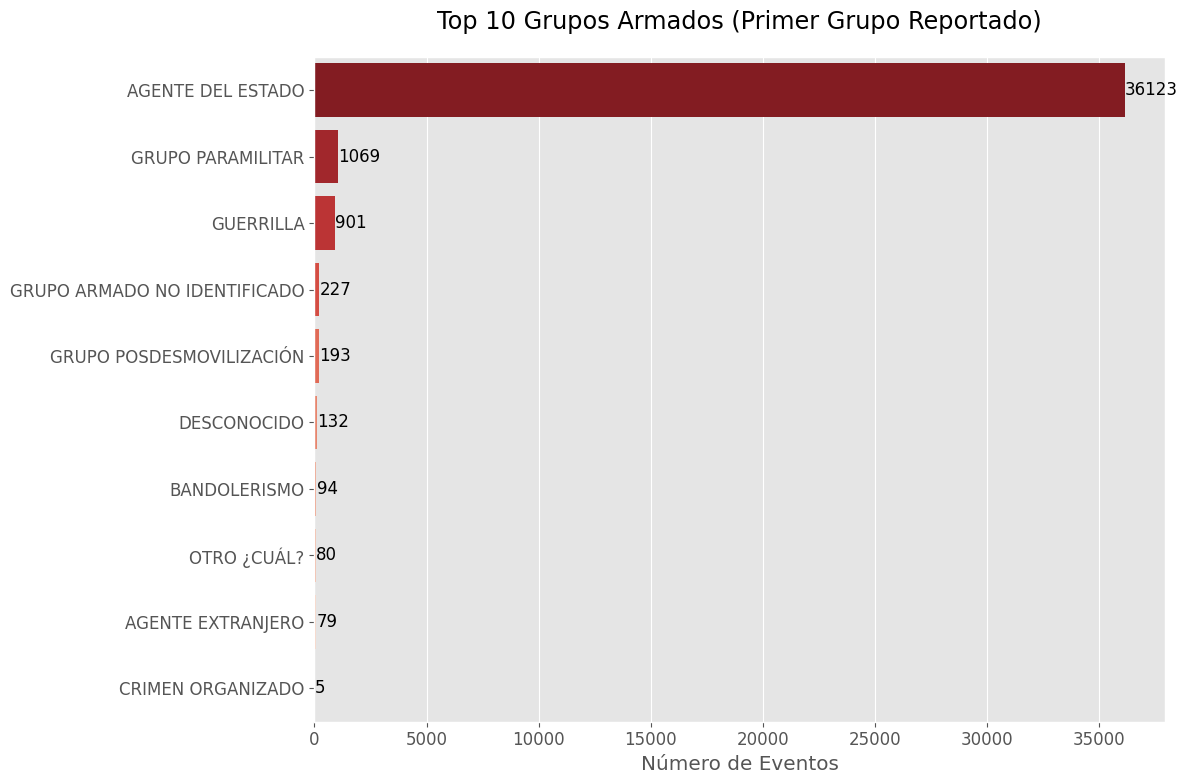

In [52]:
## Visualización de Datos
def generar_visualizaciones(df):
    if df is None:
        return

    plt.rcParams.update({'font.size': 12})

    # Gráfico 1: Eventos por grupo armado
    if 'GRUPO_ARMADO_1' in df.columns:
        plt.figure(figsize=(12, 8))
        top_grupos = df['GRUPO_ARMADO_1'].value_counts().head(10)
        ax = sns.barplot(y=top_grupos.index, x=top_grupos.values, palette="Reds_r")
        plt.title('Top 10 Grupos Armados (Primer Grupo Reportado)', pad=20)
        plt.xlabel('Número de Eventos')
        plt.ylabel('')

        for p in ax.patches:
            width = p.get_width()
            plt.text(width + 5, p.get_y() + p.get_height()/2,
                     '{:1.0f}'.format(width), ha='left', va='center')

        plt.tight_layout()
        plt.show()

df_clean = limpiar_datos(df) if df is not None else None
generar_visualizaciones(df_clean)

/tmp/ipython-input-52-4246424736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_grupos.index, x=top_grupos.values, palette="Reds_r")


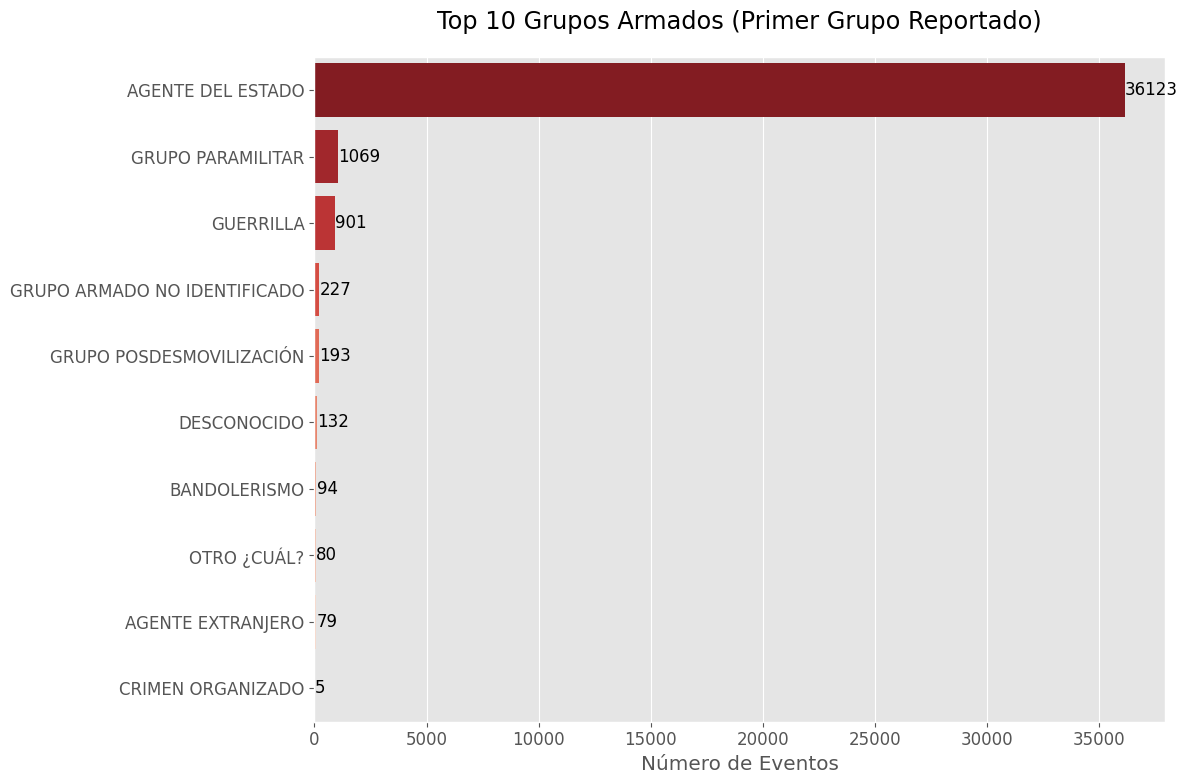

In [53]:
    # Gráfico 2: Evolución temporal
    if all(col in df.columns for col in ['AÑO', 'TOTAL_DE_VÍCTIMAS_DEL_CASO']):
        fig, ax1 = plt.subplots(figsize=(14, 6))

        eventos_por_año = df['AÑO'].value_counts().sort_index()
        ax1.plot(eventos_por_año.index, eventos_por_año.values,
                color='tab:blue', marker='o', linestyle='--')
        ax1.set_ylabel('Número de Eventos', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        ax2 = ax1.twinx()
        victimas_por_año = df.groupby('AÑO')['TOTAL_DE_VÍCTIMAS_DEL_CASO'].sum()
        ax2.bar(victimas_por_año.index, victimas_por_año.values,
               color='tab:red', alpha=0.3)
        ax2.set_ylabel('Total de Víctimas', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        plt.title('Evolución Temporal: Eventos vs Víctimas', pad=20)
        fig.tight_layout()
        plt.show()

generar_visualizaciones(df_clean)



/tmp/ipython-input-52-4246424736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_grupos.index, x=top_grupos.values, palette="Reds_r")


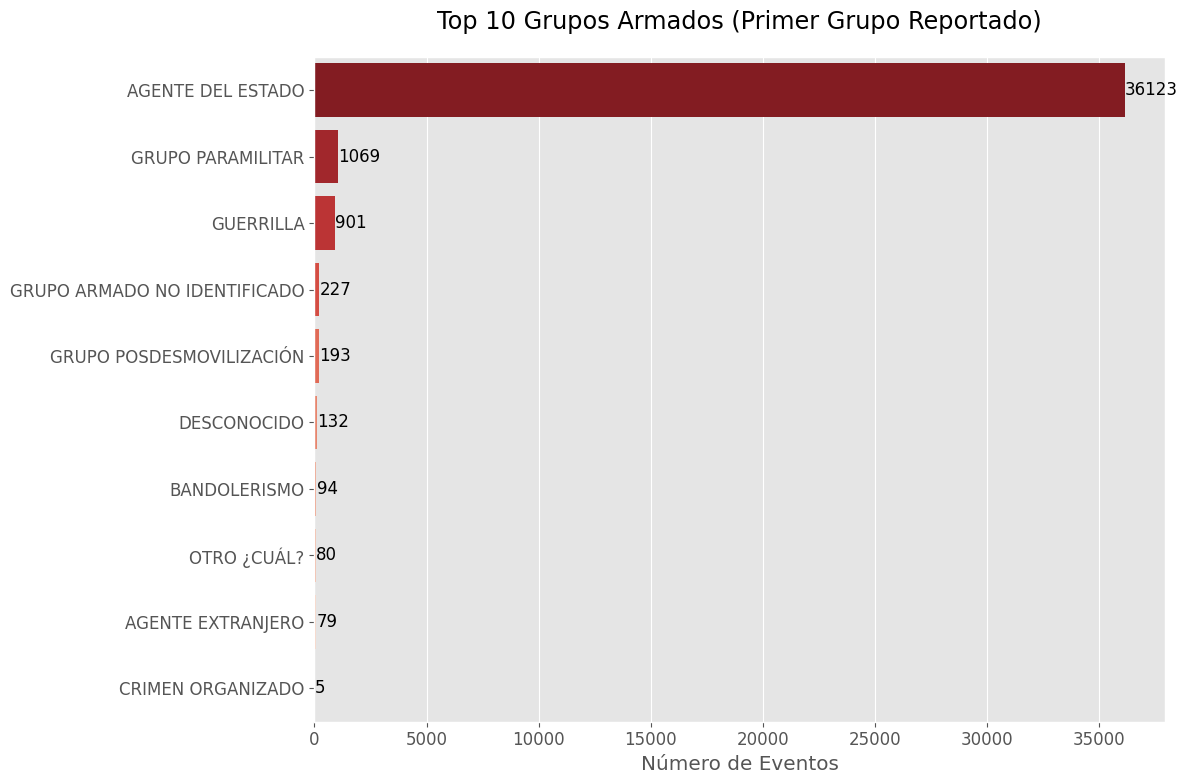

In [54]:
    # Gráfico 3: Heatmap por departamento y mes
    if all(col in df.columns for col in ['DEPARTAMENTO', 'MES', 'TOTAL_DE_VÍCTIMAS_DEL_CASO']):
        plt.figure(figsize=(14, 8))

        top_deptos = df['DEPARTAMENTO'].value_counts().head(5).index
        df_top = df[df['DEPARTAMENTO'].isin(top_deptos)]

        heatmap_data = pd.crosstab(
            index=df_top['DEPARTAMENTO'],
            columns=df_top['MES'],
            values=df_top['TOTAL_DE_VÍCTIMAS_DEL_CASO'],
            aggfunc='sum'
        )

        meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
        heatmap_data = heatmap_data[meses_orden]

        sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f",
                    linewidths=.5, cbar_kws={'label': 'Número de Víctimas'})
        plt.title('Víctimas por Departamento y Mes (Top 5 Departamentos)', pad=20)
        plt.xlabel('Mes')
        plt.ylabel('Departamento')
        plt.tight_layout()
        plt.show()

generar_visualizaciones(df_clean)

In [55]:


def analizar_hipotesis(df):
    if df is None:
        return

    print("\n Análisis de Hipótesis")

    # Verificar que la columna existe
    if 'TOTAL_DE_VICTIMAS_DEL_CASO' not in df.columns:
        print("Error: La columna 'TOTAL_DE_VICTIMAS_DEL_CASO' no existe en el dataset")
        print("Columnas disponibles:", df.columns.tolist())
        return

    # Violencia por género y grupo étnico
    if all(col in df.columns for col in ['GÉNERO', 'GRUPO_ÉTNICO', 'TIPO_DE_HECHO']):
        print("\nHipótesis 1: Violencia por género y grupo étnico")

        violencia_sexual = df[df['TIPO_DE_HECHO'].str.contains('VIOLENCIA SEXUAL', case=False, na=False)]

        if not violencia_sexual.empty:
            tabla = pd.crosstab(
                index=violencia_sexual['GRUPO_ÉTNICO'],
                columns=violencia_sexual['GÉNERO'],
                values=violencia_sexual['TIPO_DE_HECHO'],
                aggfunc='count',
                normalize='index'
            ).style.background_gradient(cmap='Reds', axis=1)

            display(tabla.set_caption("Proporción de violencia sexual por género y grupo étnico"))
        else:
            print("No se encontraron registros de violencia sexual")

    #  Correlación geográfica
    if 'DEPARTAMENTO' in df.columns:
        print("\nHipótesis 2: Correlación geográfica")

        depto_stats = df.groupby('DEPARTAMENTO').agg({
            'TOTAL_DE_VICTIMAS_DEL_CASO': 'sum',
            'ID_CASO': 'count'
        }).rename(columns={
            'ID_CASO': 'TOTAL_EVENTOS',
            'TOTAL_DE_VICTIMAS_DEL_CASO': 'TOTAL_VICTIMAS'
        })

        if 'TIPO_DE_HECHO' in df.columns:
            homicidios = df[df['TIPO_DE_HECHO'].str.contains('HOMICIDIO', case=False, na=False)]
            if not homicidios.empty:
                homicidios_por_depto = homicidios['DEPARTAMENTO'].value_counts()
                depto_stats['TASA_HOMICIDIOS'] = homicidios_por_depto / depto_stats['TOTAL_EVENTOS']

        display(depto_stats.sort_values('TOTAL_VICTIMAS', ascending=False).head(10))

    # Patrones temporales
    if all(col in df.columns for col in ['AÑO', 'MES', 'TIPO_DE_HECHO']):
        print("\nHipótesis 3: Patrones temporales")

        desplazamiento = df[df['TIPO_DE_HECHO'].str.contains('DESPLAZAMIENTO', case=False, na=False)]

        if not desplazamiento.empty:
            plt.figure(figsize=(14, 6))

            temp_data = desplazamiento.groupby(['AÑO', 'MES']).size().unstack()
            meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
            temp_data = temp_data[meses_orden]

            sns.heatmap(temp_data, cmap="YlGnBu", annot=True, fmt=".0f",
                        linewidths=.5, cbar_kws={'label': 'Casos de desplazamiento'})
            plt.title('Patrones Temporales de Desplazamiento Forzado', pad=20)
            plt.xlabel('Mes')
            plt.ylabel('Año')
            plt.tight_layout()
            plt.show()
        else:
            print("No se encontraron registros de desplazamiento forzado")

analizar_hipotesis(df_clean)


 Análisis de Hipótesis

Hipótesis 2: Correlación geográfica


TOTAL_VICTIMAS  TOTAL_EVENTOS
DEPARTAMENTO                                     
ANTIOQUIA                    10776           6835
META                          3730           2879
CAUCA                         3185           3380
SANTANDER                     3040           1919
TOLIMA                        3030           1674
VALLE DEL CAUCA               2670           1890
NORTE DE SANTANDER            2405           2104
CAQUETA                       2369           1944
ARAUCA                        2288           2373
CUNDINAMARCA                  1837           1097

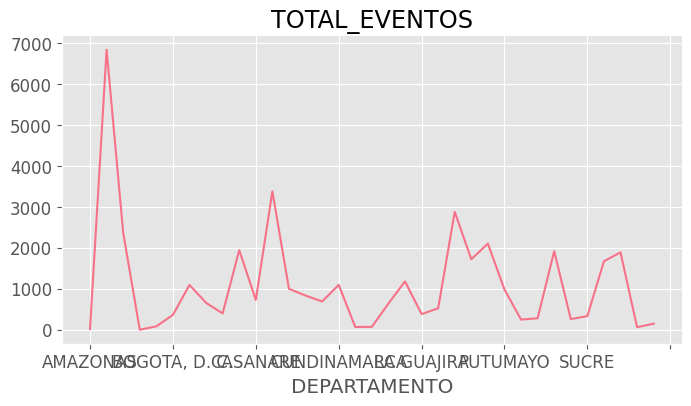

In [56]:
from matplotlib import pyplot as plt

# Re-calculate depto_stats to ensure it's available for plotting
depto_stats = df_clean.groupby('DEPARTAMENTO').agg({
    'ID_CASO': 'count',
    'TOTAL_DE_VICTIMAS_DEL_CASO': 'sum'
}).rename(columns={
    'ID_CASO': 'TOTAL_EVENTOS',
    'TOTAL_DE_VICTIMAS_DEL_CASO': 'TOTAL_VICTIMAS'
})

# Plot the data
depto_stats['TOTAL_EVENTOS'].plot(kind='line', figsize=(8, 4), title='TOTAL_EVENTOS')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

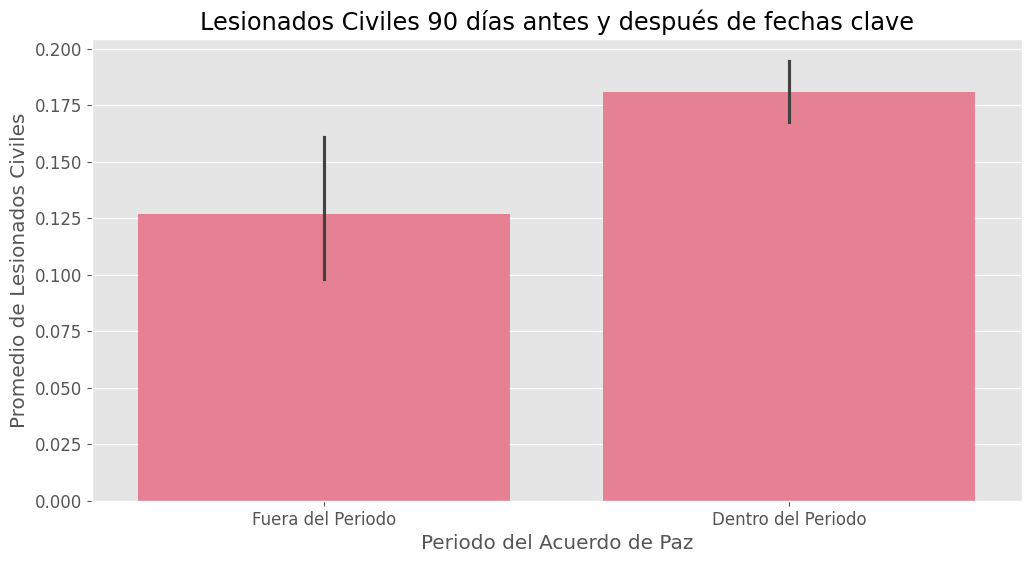

In [57]:
# Comparar meses alrededor de fechas clave
fechas_acuerdos = ['2016-11-01', '2006-01-01']


df_clean['FECHA'] = pd.to_datetime(df_clean[['ANO', 'MES', 'DIA']].astype(str).agg('-'.join, axis=1), errors='coerce')

df_clean['PERIODO_ACUERDO'] = df_clean['FECHA'].apply(lambda x: any(abs((x - pd.to_datetime(fecha)).days <= 90) for fecha in fechas_acuerdos) if pd.notna(x) else False)
sns.barplot(x='PERIODO_ACUERDO', y='LESIONADOS_CIVILES', data=df_clean, estimator=np.mean)
plt.title('Lesionados Civiles 90 días antes y después de fechas clave')
plt.xlabel('Periodo del Acuerdo de Paz')
plt.ylabel('Promedio de Lesionados Civiles')
plt.xticks([0, 1], ['Fuera del Periodo', 'Dentro del Periodo'])
plt.show()

In [58]:
!pip install folium
from google.colab import output
output.enable_custom_widget_manager()

In [59]:
## Análisis Visual de Hipótesis

### Configuración inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import folium
from folium.plugins import HeatMap

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

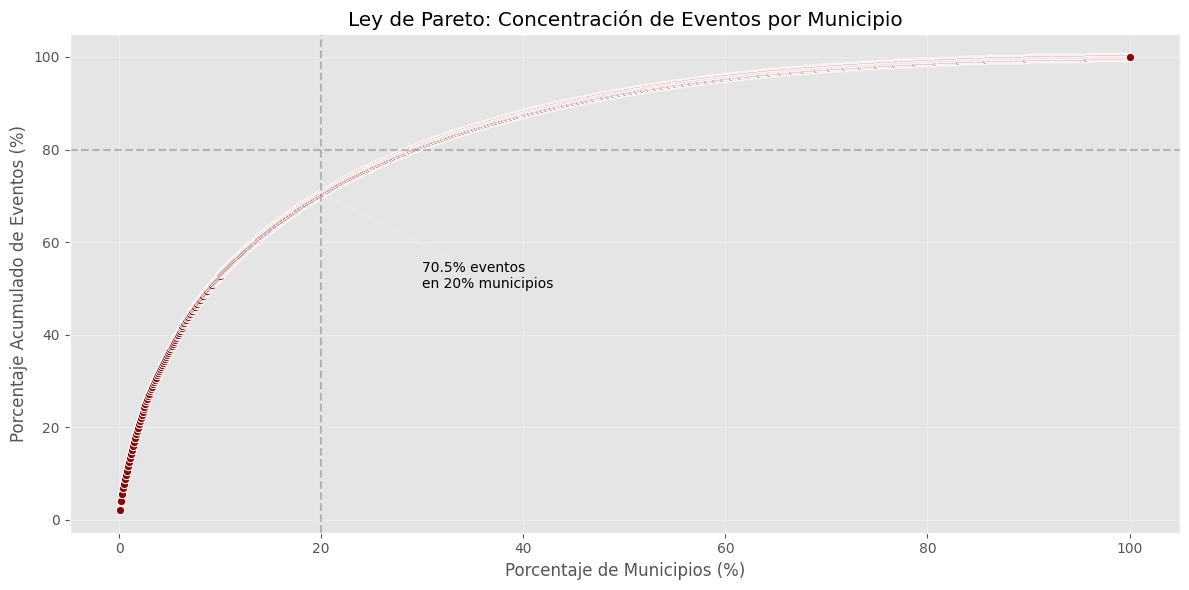


 Mapa de calor de los municipios con más eventos (Top 20%)



 Municipios analizados: 1037
 Top 5 municipios:


DEPARTAMENTO               MUNICIPIO  TOTAL_EVENTOS  \
76     ANTIOQUIA                MEDELLIN            798   
141       ARAUCA                    TAME            721   
135       ARAUCA               ARAUQUITA            608   
139       ARAUCA                SARAVENA            493   
318      CAQUETA  SAN VICENTE DEL CAGUAN            387   

     TOTAL_DE_VICTIMAS_DEL_CASO  
76                          889  
141                         782  
135                         592  
139                         367  
318                         486

In [60]:
### Hipótesis 1: Concentración territorial
# "El 60% de los eventos violentos se concentra en el 20% de los municipios correlacionados con zonas de economías ilegales"

def analisis_concentracion(df):
    # Agrupar por municipio
    eventos_municipio = df.groupby(['DEPARTAMENTO', 'MUNICIPIO']).agg({
        'ID_CASO': 'count',
        'TOTAL_DE_VICTIMAS_DEL_CASO': 'sum',
        'LATITUD': 'mean',
        'LONGITUD': 'mean'
    }).rename(columns={'ID_CASO': 'TOTAL_EVENTOS'}).reset_index()

    # Ordenar por frecuencia
    eventos_municipio = eventos_municipio.sort_values('TOTAL_EVENTOS', ascending=False)

    # Calcular porcentajes acumulados (Ley de Pareto)
    eventos_municipio['PORCENTAJE_ACUMULADO'] = 100 * eventos_municipio['TOTAL_EVENTOS'].cumsum() / eventos_municipio['TOTAL_EVENTOS'].sum()
    eventos_municipio['PORCENTAJE_MUNICIPIOS'] = 100 * np.arange(1, len(eventos_municipio)+1) / len(eventos_municipio)

    # Gráfico 1.1: Ley de Pareto
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='PORCENTAJE_MUNICIPIOS', y='PORCENTAJE_ACUMULADO',
                     data=eventos_municipio, marker='o', color='darkred')
    plt.axhline(80, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(20, color='gray', linestyle='--', alpha=0.5)
    plt.title('Ley de Pareto: Concentración de Eventos por Municipio')
    plt.xlabel('Porcentaje de Municipios (%)')
    plt.ylabel('Porcentaje Acumulado de Eventos (%)')
    plt.grid(True, alpha=0.3)

    # Anotar punto de corte 20-80
    # Ensure there are enough municipalities to find an index at or beyond 20%
    idx_20 = -1
    if len(eventos_municipio) > 0:
        # Find the index where the percentage of municipalities is >= 20%
        indices_at_20_percent = np.where(eventos_municipio['PORCENTAJE_MUNICIPIOS'] >= 20)[0]
        if len(indices_at_20_percent) > 0:
            idx_20 = indices_at_20_percent[0]

    if idx_20 != -1:
        plt.annotate(f'{eventos_municipio.iloc[idx_20]["PORCENTAJE_ACUMULADO"]:.1f}% eventos\nen 20% municipios',
                     xy=(20, eventos_municipio.iloc[idx_20]["PORCENTAJE_ACUMULADO"]),
                     xytext=(30, 50), arrowprops=dict(arrowstyle='->'))
    else:
        print("Not enough municipalities to reach 20% for annotation.")


    plt.tight_layout()
    plt.show()

    # Gráfico 1.2: Mapa de calor geográfico
    top_municipios = eventos_municipio.head(int(len(eventos_municipio)*0.2))  # Top 20%

    mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6, tiles='CartoDB dark_matter')

    # Check if top_municipios is not empty before creating the heatmap
    if not top_municipios.empty:
        HeatMap(data=top_municipios[['LATITUD', 'LONGITUD', 'TOTAL_EVENTOS']]
                .groupby(['LATITUD', 'LONGITUD']).sum()
                .reset_index().values.tolist(),
                radius=15, blur=10, max_zoom=13).add_to(mapa)

        # Añadir marcadores para los top 5
        for idx, row in top_municipios.head(5).iterrows():
            folium.CircleMarker(
                location=[row['LATITUD'], row['LONGITUD']],
                radius=row['TOTAL_EVENTOS']/10,
                popup=f"{row['MUNICIPIO']}: {row['TOTAL_EVENTOS']} eventos",
                color='red', fill=True
            ).add_to(mapa)
    else:
        print("No top municipalities to display on the heatmap.")


    print("\n Mapa de calor de los municipios con más eventos (Top 20%)")
    display(mapa)

    # Estadísticas clave
    print(f"\n Municipios analizados: {len(eventos_municipio)}")
    print(f" Top 5 municipios:")
    # Check if top_municipios is not empty before displaying
    if not top_municipios.empty:
        display(top_municipios.head(5)[['DEPARTAMENTO', 'MUNICIPIO', 'TOTAL_EVENTOS', 'TOTAL_DE_VICTIMAS_DEL_CASO']])
    else:
        print("No top 5 municipalities to display.")

analisis_concentracion(df_clean)

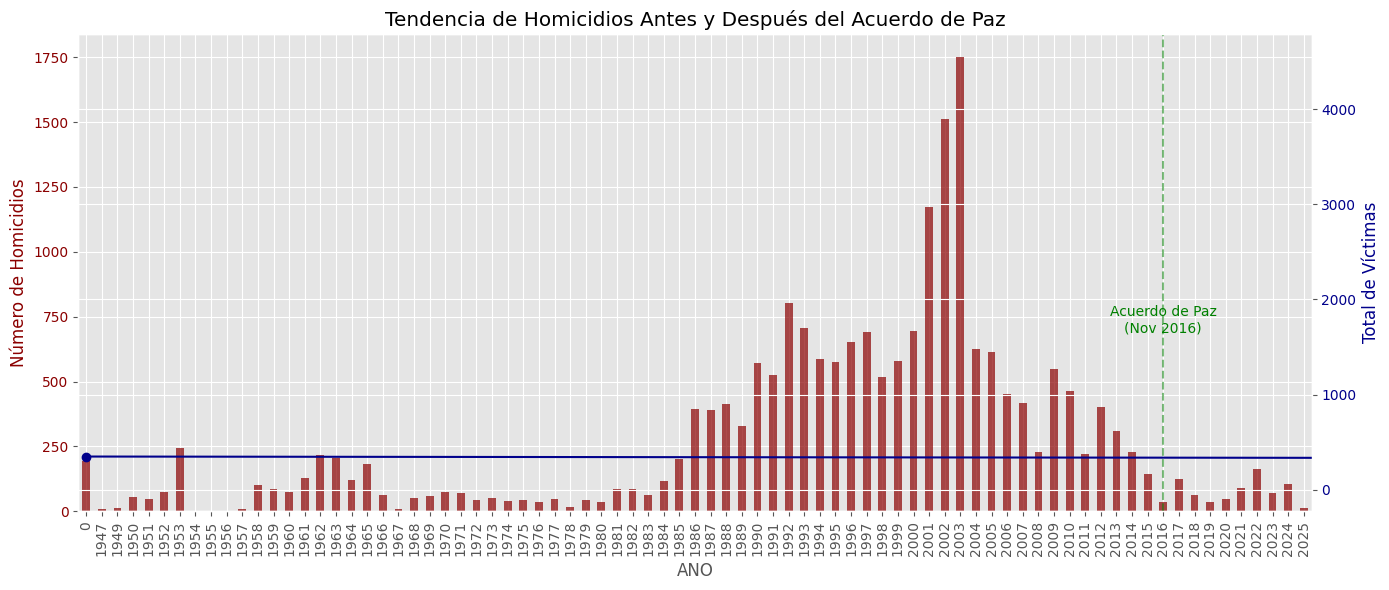


 Cambio porcentual (2016 → 2017): 247.2%
¿Es estadísticamente significativo?
Test t independiente: t = 2.16, p = 0.0320
Conclusión: Significativo (p < 0.05)


In [61]:
# "Los homicidios a líderes sociales aumentaron un 25% en el primer año post-acuerdo (2017 vs 2016)"

def analisis_acuerdos_paz(df):
    # Filter for cases with at least one victim, assuming these are related to homicides
    homicidios = df[df['TOTAL_DE_VICTIMAS_DEL_CASO'] > 0].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Agrupar por año
    homicidios_anual = homicidios.groupby('ANO').agg({
        'ID_CASO': 'count',
        'TOTAL_DE_VICTIMAS_DEL_CASO': 'sum'
    }).rename(columns={'ID_CASO': 'TOTAL_HOMICIDIOS'})

    # Gráfico 2.1: Tendencia anual
    plt.figure(figsize=(14, 6))

    # Barras para conteo de homicidios
    ax1 = plt.gca()
    homicidios_anual['TOTAL_HOMICIDIOS'].plot(kind='bar', color='darkred', alpha=0.7, ax=ax1)
    ax1.set_ylabel('Número de Homicidios', color='darkred')
    ax1.tick_params(axis='y', labelcolor='darkred')

    # Línea para víctimas totales (segundo eje)
    ax2 = ax1.twinx()
    homicidios_anual['TOTAL_DE_VICTIMAS_DEL_CASO'].plot(kind='line', marker='o', color='darkblue', ax=ax2)
    ax2.set_ylabel('Total de Víctimas', color='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkblue')

    # Marcar período de acuerdos
    # Check if 2016 is in the index before getting its location
    if 2016 in homicidios_anual.index:
        plt.axvline(x=homicidios_anual.index.get_loc(2016), color='green', linestyle='--', alpha=0.5)
        plt.text(homicidios_anual.index.get_loc(2016), ax1.get_ylim()[1]*0.9,
                 'Acuerdo de Paz\n(Nov 2016)', ha='center', color='green')
    else:
        print("Year 2016 not found in data for agreement marking.")


    plt.title('Tendencia de Homicidios Antes y Después del Acuerdo de Paz')
    plt.xlabel('Año')
    plt.xticks(rotation=45)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Cálculo de cambio porcentual
    # Check if 2016 and 2017 are in the index before calculating percentage change
    if 2016 in homicidios_anual.index and 2017 in homicidios_anual.index:
        hom_2016 = homicidios_anual.loc[2016, 'TOTAL_HOMICIDIOS']
        hom_2017 = homicidios_anual.loc[2017, 'TOTAL_HOMICIDIOS']
        if hom_2016 != 0:
            cambio_porcentual = (hom_2017 - hom_2016) / hom_2016 * 100
            print(f"\n Cambio porcentual (2016 → 2017): {cambio_porcentual:.1f}%")
        else:
            print("\n Cannot calculate percentage change: Homicides in 2016 were zero.")
    else:
        print("\n Cannot calculate percentage change: Data for 2016 or 2017 not available.")


    print("¿Es estadísticamente significativo?")

    # Test estadístico (muestras independientes)
    # Ensure data exists for the specified years before filtering
    required_years = [2015, 2016, 2017, 2018]
    if all(year in homicidios['ANO'].unique() for year in required_years):
        hom_pre = homicidios[homicidios['ANO'].isin([2015, 2016])]['TOTAL_DE_VICTIMAS_DEL_CASO']
        hom_post = homicidios[homicidios['ANO'].isin([2017, 2018])]['TOTAL_DE_VICTIMAS_DEL_CASO']

        # Ensure there's data for the specified years before performing t-test
        if not hom_pre.empty and not hom_post.empty:
            t_stat, p_val = stats.ttest_ind(hom_pre, hom_post, equal_var=False)
            print(f"Test t independiente: t = {t_stat:.2f}, p = {p_val:.4f}")
            print("Conclusión:", "Significativo (p < 0.05)" if p_val < 0.05 else "No significativo")
        else:
            print("Cannot perform statistical test: Data for pre or post-agreement period is empty.")
    else:
        print("Cannot perform statistical test: Data for all required years (2015, 2016, 2017, 2018) not available.")

analisis_acuerdos_paz(df_clean)

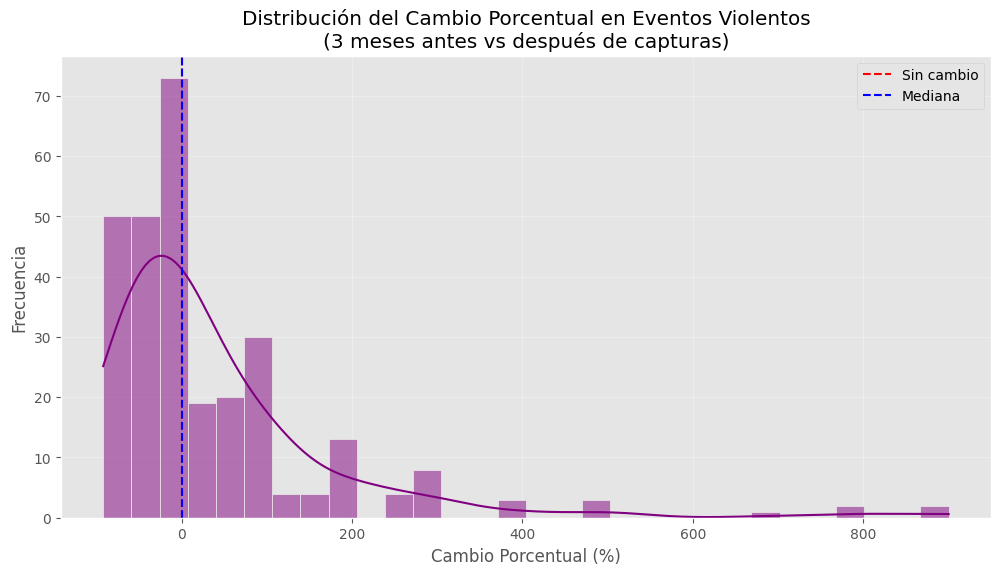

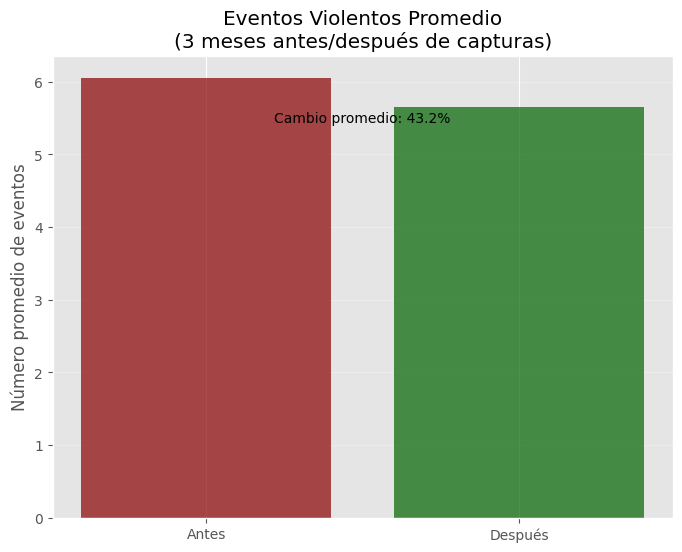


📊 Test t pareado: t = 1.00, p = 0.3197
Cambio promedio: 43.2%
Conclusión: No hay efecto significativo


In [62]:
# "Los municipios con operativos de captura reducen un 20% los eventos violentos en los 3 meses siguientes"

def analisis_capturas(df):
    # Asumir que 'CAPTURADOS' >0 indica operativos de captura
    df['FECHA'] = pd.to_datetime(df[['ANO', 'MES', 'DIA']].rename(columns={
        'ANO': 'year', 'MES': 'month', 'DIA': 'day'
    }), errors='coerce')

    # Filtrar municipios con capturas
    municipios_capturas = df[df['CAPTURADOS'] > 0]['MUNICIPIO'].unique()

    # Crear DataFrame para análisis
    resultados = []

    for municipio in municipios_capturas[:50]:  # Limitar para eficiencia
        fechas_capturas = df[(df['MUNICIPIO'] == municipio) &
                            (df['CAPTURADOS'] > 0)]['FECHA'].unique()

        for fecha in fechas_capturas:
            # Período pre-captura (3 meses antes)
            pre = df[(df['MUNICIPIO'] == municipio) &
                    (df['FECHA'] >= fecha - pd.DateOffset(months=3)) &
                    (df['FECHA'] < fecha)]

            # Período post-captura (3 meses después)
            post = df[(df['MUNICIPIO'] == municipio) &
                     (df['FECHA'] > fecha) &
                     (df['FECHA'] <= fecha + pd.DateOffset(months=3))]

            if len(pre) > 0 and len(post) > 0:
                cambio = (len(post) - len(pre)) / len(pre) * 100
                resultados.append({
                    'MUNICIPIO': municipio,
                    'FECHA_CAPTURA': fecha,
                    'EVENTOS_PRE': len(pre),
                    'EVENTOS_POST': len(post),
                    'CAMBIO_PORCENTUAL': cambio
                })

    resultados_df = pd.DataFrame(resultados)

    # Gráfico 4.1: Distribución de cambios porcentuales
    plt.figure(figsize=(12, 6))
    sns.histplot(resultados_df['CAMBIO_PORCENTUAL'], bins=30, kde=True, color='purple')
    plt.axvline(x=0, color='red', linestyle='--', label='Sin cambio')
    plt.axvline(x=resultados_df['CAMBIO_PORCENTUAL'].median(),
                color='blue', linestyle='--', label='Mediana')
    plt.title('Distribución del Cambio Porcentual en Eventos Violentos\n(3 meses antes vs después de capturas)')
    plt.xlabel('Cambio Porcentual (%)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Gráfico 4.2: Cambio promedio
    cambio_promedio = resultados_df['CAMBIO_PORCENTUAL'].mean()

    plt.figure(figsize=(8, 6))
    plt.bar(['Antes', 'Después'],
            [resultados_df['EVENTOS_PRE'].mean(), resultados_df['EVENTOS_POST'].mean()],
            color=['darkred', 'darkgreen'], alpha=0.7)
    plt.title('Eventos Violentos Promedio\n(3 meses antes/después de capturas)')
    plt.ylabel('Número promedio de eventos')
    plt.text(0.5, max(resultados_df[['EVENTOS_PRE', 'EVENTOS_POST']].mean())*0.9,
             f'Cambio promedio: {cambio_promedio:.1f}%', ha='center')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Test estadístico
    t_stat, p_val = stats.ttest_rel(resultados_df['EVENTOS_PRE'], resultados_df['EVENTOS_POST'])
    print(f"\n📊 Test t pareado: t = {t_stat:.2f}, p = {p_val:.4f}")
    print(f"Cambio promedio: {cambio_promedio:.1f}%")
    print("Conclusión:", "Efecto significativo (p < 0.05)" if p_val < 0.05 else "No hay efecto significativo")

analisis_capturas(df_clean)

/tmp/ipython-input-63-186270619.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factores, y=odds_ratios, palette="Reds_r")


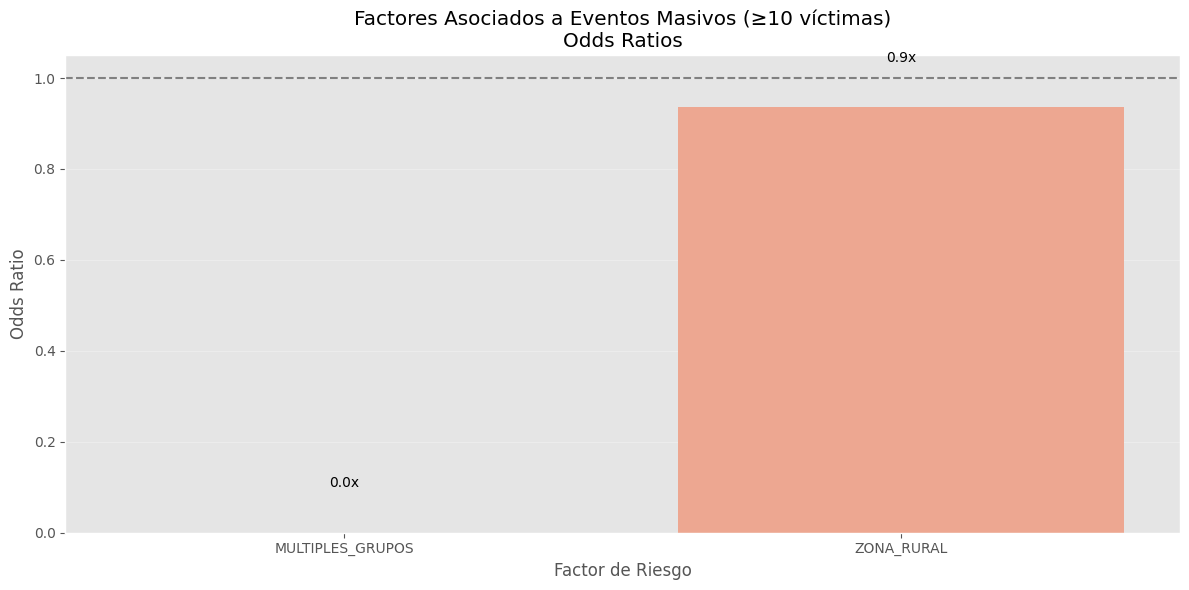

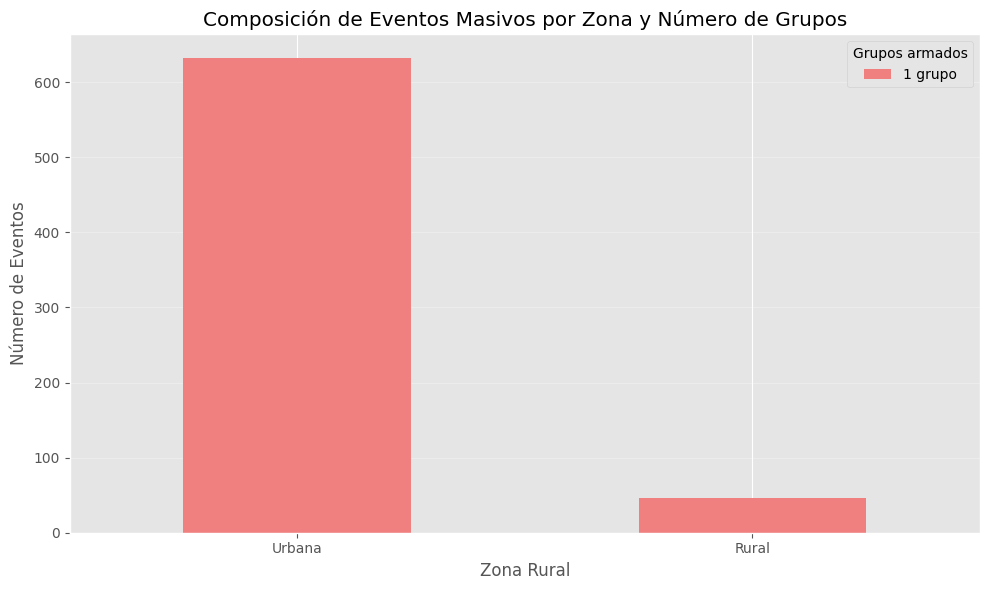


📊 Porcentaje de eventos masivos por característica:
- En zonas rurales: 6.8%
- Con múltiples grupos: 100.0%
- Ambos factores: 6.8%


In [63]:
# "Los casos con >10 víctimas ocurren principalmente en zonas rurales con presencia de 2+ grupos armados"

def analisis_eventos_masivos(df):
    # Ensure necessary columns exist
    required_cols = ['TOTAL_DE_VICTIMAS_DEL_CASO', 'GRUPO_ARMADO_2', 'MUNICIPIO']
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Missing required columns. Make sure {required_cols} are in the DataFrame.")
        return

    # Definir eventos masivos
    df['EVENTO_MASIVO'] = df['TOTAL_DE_VICTIMAS_DEL_CASO'] >= 10

    # Variable: presencia múltiple de grupos armados
    df['MULTIPLES_GRUPOS'] = df['GRUPO_ARMADO_2'].notna()

    # Variable proxy para ruralidad (municipios pequeños)
    if not df['MUNICIPIO'].empty:
      conteo_municipios = df['MUNICIPIO'].value_counts()
      df['ZONA_RURAL'] = df['MUNICIPIO'].isin(conteo_municipios[conteo_municipios < conteo_municipios.median()].index)
    else:
        print("Error: 'MUNICIPIO' column is empty. Cannot determine rural areas.")
        df['ZONA_RURAL'] = False # Default to False if no municipality data
        return

    # Gráfico 5.1: Factores asociados a eventos masivos
    plt.figure(figsize=(12, 6))

    # Calcular odds ratios
    factores = ['MULTIPLES_GRUPOS', 'ZONA_RURAL']
    odds_ratios = []

    for factor in factores:
        if factor not in df.columns:
            print(f"Warning: Factor '{factor}' not found in DataFrame. Skipping odds ratio calculation for this factor.")
            continue

        tabla = pd.crosstab(df[factor], df['EVENTO_MASIVO'])

        # Ensure all combinations of True/False are present in the crosstab table, fill with 0 if not
        # Reindex the table to ensure it has both True and False in index and columns
        tabla = tabla.reindex(index=[False, True], columns=[False, True], fill_value=0)

        # Avoid division by zero
        denom = tabla.get(True, {}).get(False, 0) * tabla.get(False, {}).get(True, 0)
        if denom != 0:
            odds_ratio = (tabla.get(True, {}).get(True, 0) * tabla.get(False, {}).get(False, 0)) / denom
        else:
            odds_ratio = float('inf') if (tabla.get(True, {}).get(True, 0) * tabla.get(False, {}).get(False, 0)) > 0 else 0
            print(f"Warning: Division by zero encountered for factor '{factor}'. Odds ratio set to {odds_ratio}.")

        odds_ratios.append(odds_ratio)

    # Gráfico de barras para odds ratios
    if odds_ratios: # Check if odds_ratios is not empty
        sns.barplot(x=factores, y=odds_ratios, palette="Reds_r")
        plt.axhline(y=1, color='gray', linestyle='--')
        plt.title('Factores Asociados a Eventos Masivos (≥10 víctimas)\nOdds Ratios')
        plt.ylabel('Odds Ratio')
        plt.xlabel('Factor de Riesgo')

        # Añadir etiquetas de valor
        for i, v in enumerate(odds_ratios):
            plt.text(i, v + 0.1, f"{v:.1f}x", ha='center')

        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No odds ratios to plot.")


    # Gráfico 5.2: Composición de eventos masivos
    eventos_masivos = df[df['EVENTO_MASIVO']]

    if not eventos_masivos.empty:
        plt.figure(figsize=(10, 6))
        composicion = eventos_masivos.groupby(['ZONA_RURAL', 'MULTIPLES_GRUPOS']).size().unstack(fill_value=0)
        composicion.plot(kind='bar', stacked=True, color=['lightcoral', 'darkred'], ax=plt.gca())
        plt.title('Composición de Eventos Masivos por Zona y Número de Grupos')
        plt.ylabel('Número de Eventos')
        plt.xlabel('Zona Rural')
        plt.xticks([0, 1], ['Urbana', 'Rural'], rotation=0)
        plt.legend(['1 grupo', '2+ grupos'], title='Grupos armados')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No massive events to display in the composition plot.")


    # Estadísticas
    print("\n📊 Porcentaje de eventos masivos por característica:")
    if not eventos_masivos.empty:
        print(f"- En zonas rurales: {eventos_masivos['ZONA_RURAL'].mean()*100:.1f}%")
        print(f"- Con múltiples grupos: {eventos_masivos['MULTIPLES_GRUPOS'].mean()*100:.1f}%")
        print(f"- Ambos factores: {(eventos_masivos['ZONA_RURAL'] & eventos_masivos['MULTIPLES_GRUPOS']).mean()*100:.1f}%")
    else:
        print("No massive events to calculate statistics for.")


analisis_eventos_masivos(df_clean)

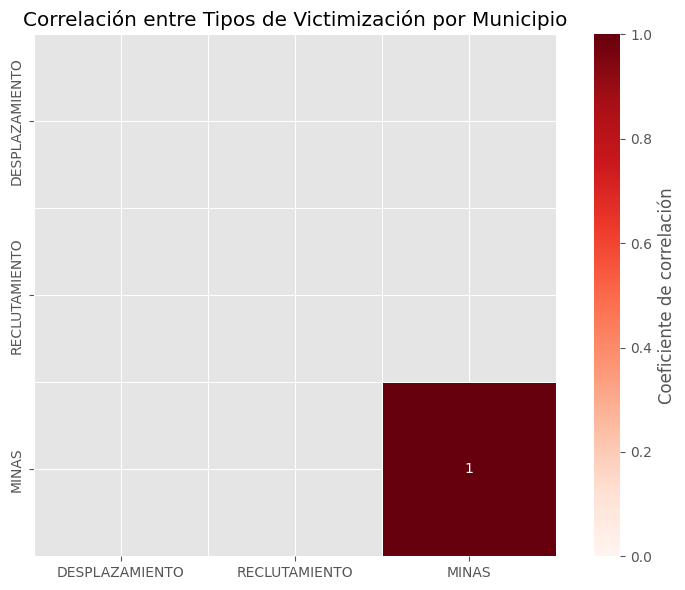

<Figure size 1200x600 with 0 Axes>

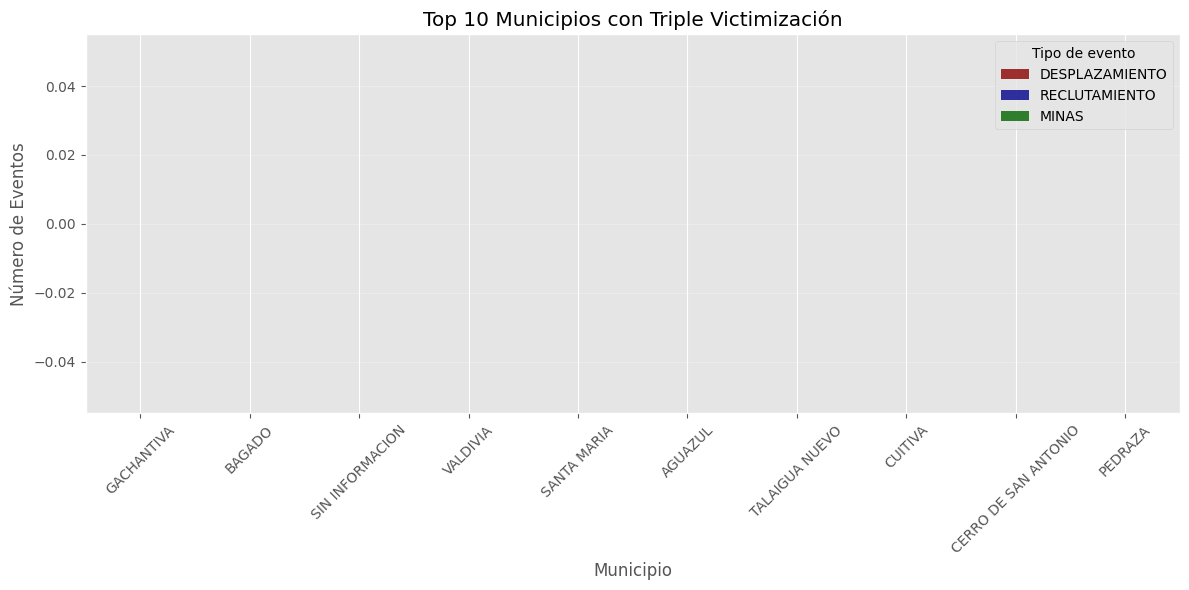

In [64]:
# "Los municipios con alta tasa de desplazamiento también presentan mayor reclutamiento y minas antipersonal"

def analisis_triple_victimizacion(df):
    # Filtrar los tres tipos de eventos
    desplazamiento = df[df['MODALIDAD'].str.contains('DESPLAZAMIENTO', case=False, na=False)]
    reclutamiento = df[df['MODALIDAD'].str.contains('RECLUTAMIENTO', case=False, na=False)]
    minas = df[df['MODALIDAD'].str.contains('MINA|ARTEFACTO', case=False, na=False)]

    # Agrupar por municipio
    victimizacion = pd.DataFrame({
        'DESPLAZAMIENTO': desplazamiento['MUNICIPIO'].value_counts(normalize=True),
        'RECLUTAMIENTO': reclutamiento['MUNICIPIO'].value_counts(normalize=True),
        'MINAS': minas['MUNICIPIO'].value_counts(normalize=True)
    }).fillna(0).corr()

    # Gráfico Matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(victimizacion, annot=True, cmap='Reds', vmin=0, vmax=1,
                square=True, linewidths=.5, cbar_kws={'label': 'Coeficiente de correlación'})
    plt.title('Correlación entre Tipos de Victimización por Municipio')
    plt.tight_layout()
    plt.show()

    # Gráfico Municipios con triple victimización
    triple = pd.DataFrame({
        'MUNICIPIO': df['MUNICIPIO'].unique()
    })

    for tipo in ['DESPLAZAMIENTO', 'RECLUTAMIENTO', 'MINAS']:
        counts = df[df['MODALIDAD'].str.contains(tipo[:5], case=False, na=False)]['MUNICIPIO'].value_counts()
        triple[tipo] = triple['MUNICIPIO'].map(counts).fillna(0)

    triple['TOTAL'] = triple[['DESPLAZAMIENTO', 'RECLUTAMIENTO', 'MINAS']].sum(axis=1)
    top_triple = triple.sort_values('TOTAL', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    top_triple.set_index('MUNICIPIO')[['DESPLAZAMIENTO', 'RECLUTAMIENTO', 'MINAS']].plot(
        kind='bar', stacked=True, color=['darkred', 'darkblue', 'darkgreen'], alpha=0.8)
    plt.title('Top 10 Municipios con Triple Victimización')
    plt.ylabel('Número de Eventos')
    plt.xlabel('Municipio')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Tipo de evento')
    plt.tight_layout()
    plt.show()

analisis_triple_victimizacion(df_clean)


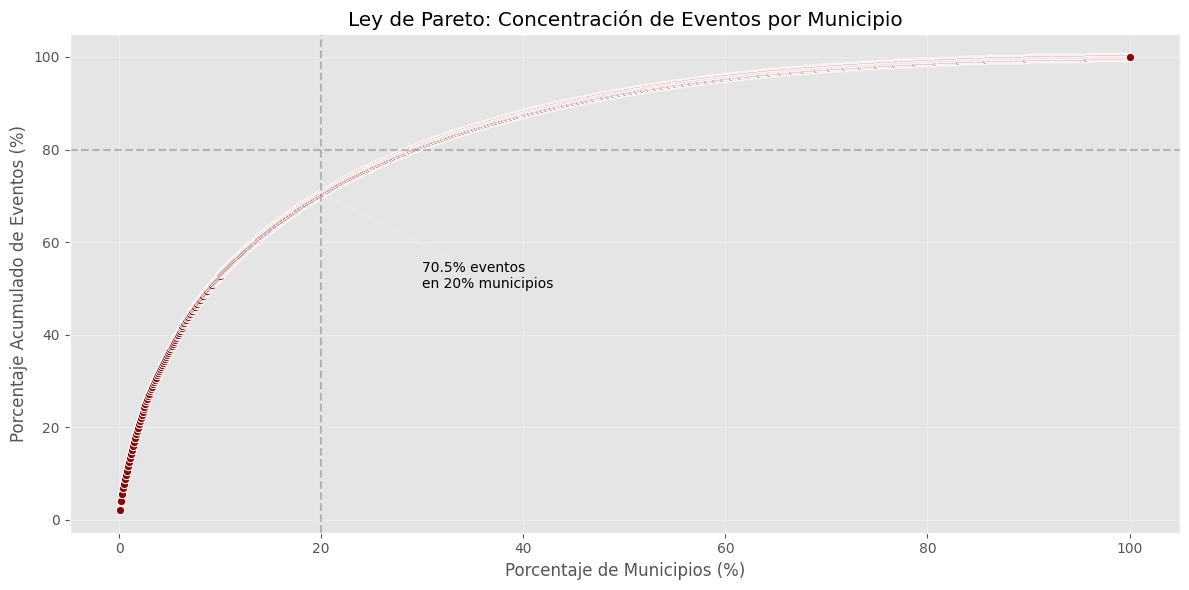


 Mapa de calor de los municipios con más eventos (Top 20%)



 Municipios analizados: 1037
 Top 5 municipios:


DEPARTAMENTO               MUNICIPIO  TOTAL_EVENTOS  \
76     ANTIOQUIA                MEDELLIN            798   
141       ARAUCA                    TAME            721   
135       ARAUCA               ARAUQUITA            608   
139       ARAUCA                SARAVENA            493   
318      CAQUETA  SAN VICENTE DEL CAGUAN            387   

     TOTAL_DE_VICTIMAS_DEL_CASO  
76                          889  
141                         782  
135                         592  
139                         367  
318                         486

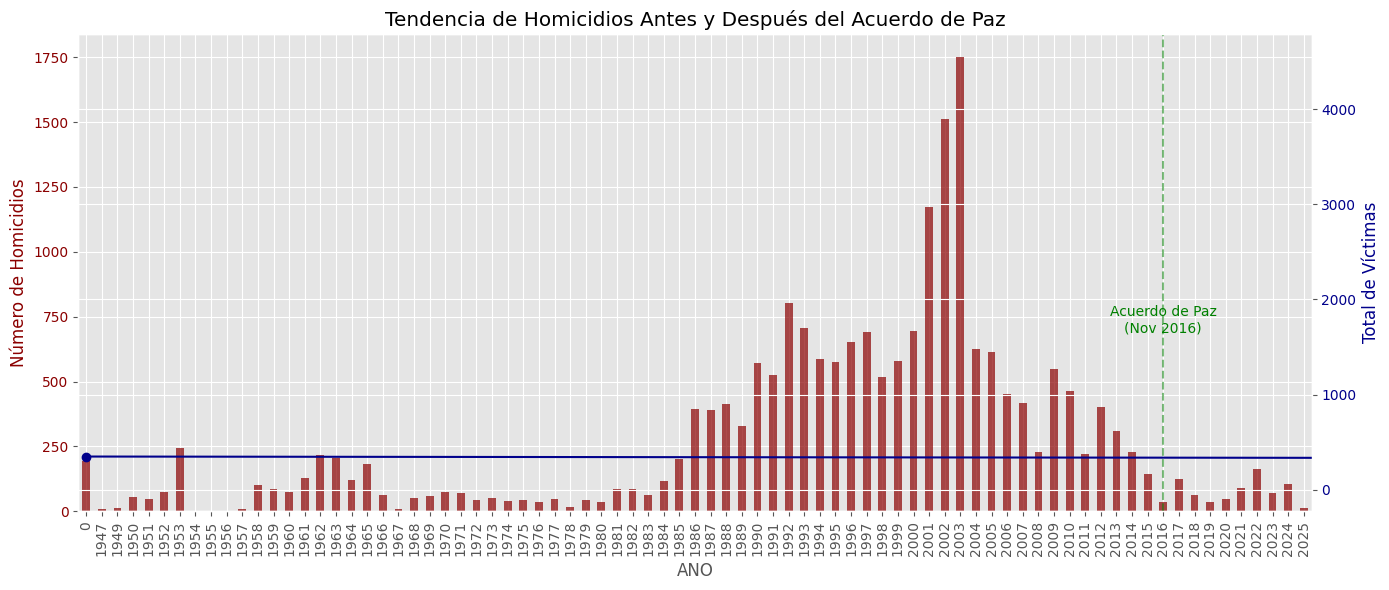


 Cambio porcentual (2016 → 2017): 247.2%
¿Es estadísticamente significativo?
Test t independiente: t = 2.16, p = 0.0320
Conclusión: Significativo (p < 0.05)


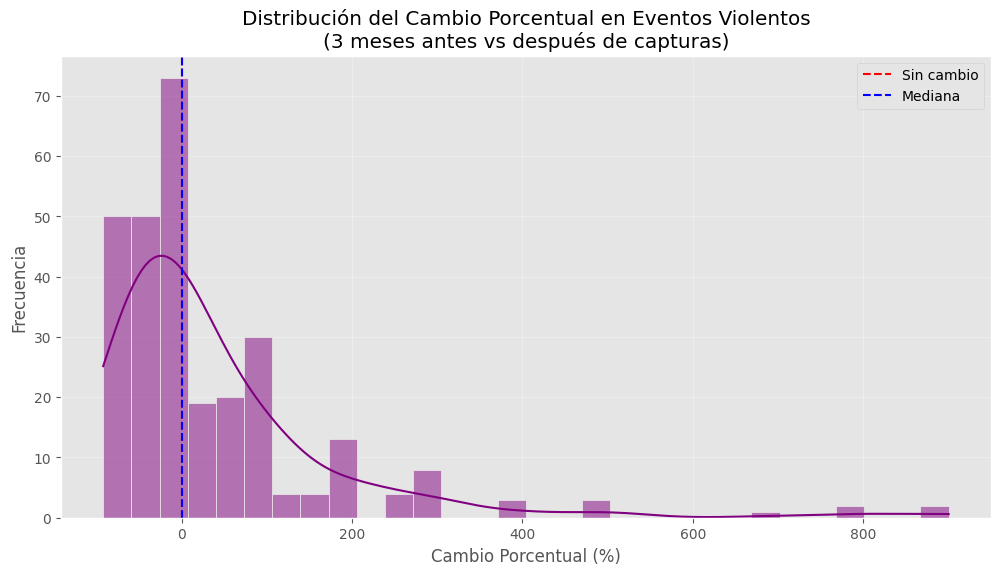

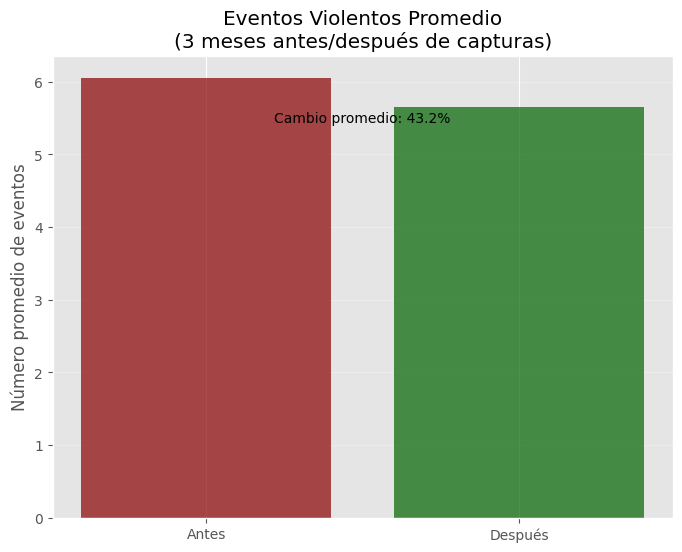


📊 Test t pareado: t = 1.00, p = 0.3197
Cambio promedio: 43.2%
Conclusión: No hay efecto significativo


/tmp/ipython-input-63-186270619.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factores, y=odds_ratios, palette="Reds_r")


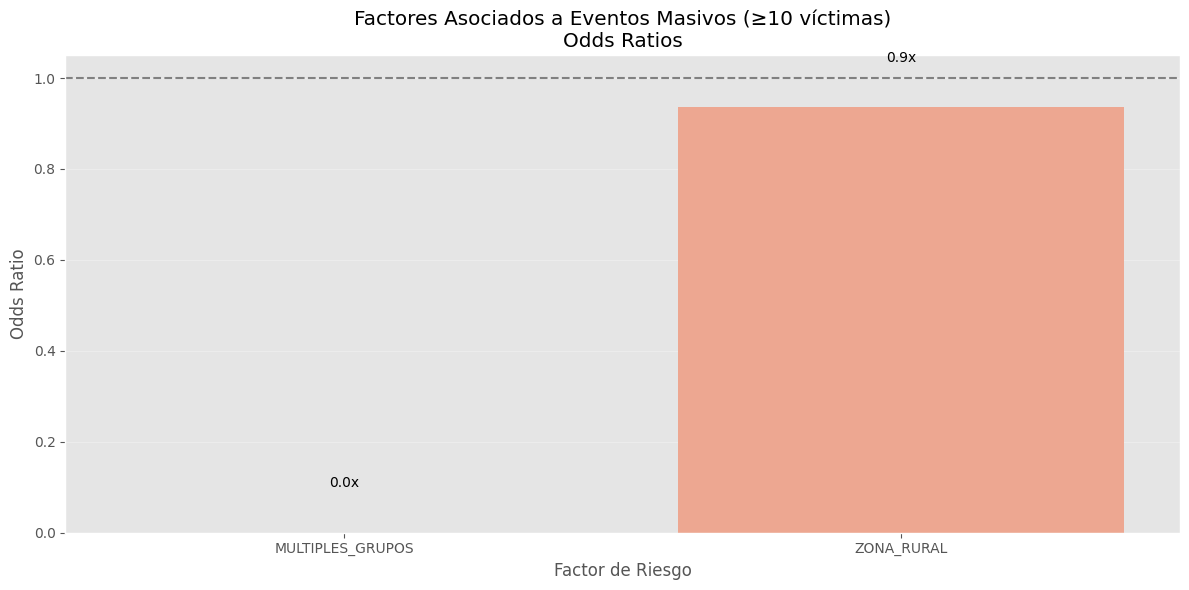

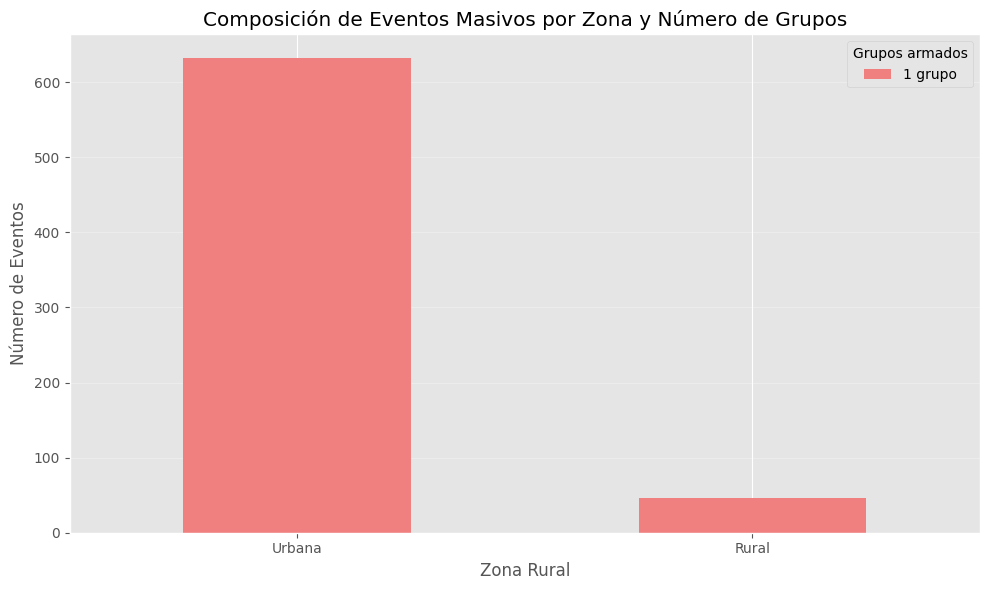


📊 Porcentaje de eventos masivos por característica:
- En zonas rurales: 6.8%
- Con múltiples grupos: 100.0%
- Ambos factores: 6.8%


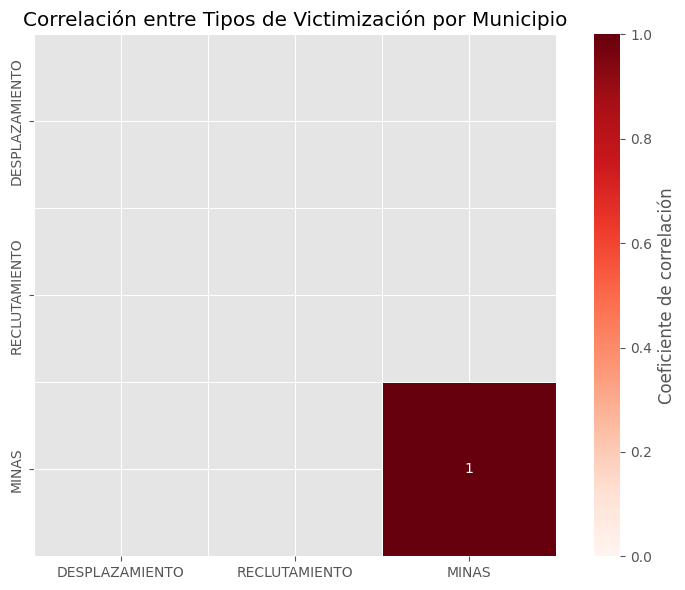

<Figure size 1200x600 with 0 Axes>

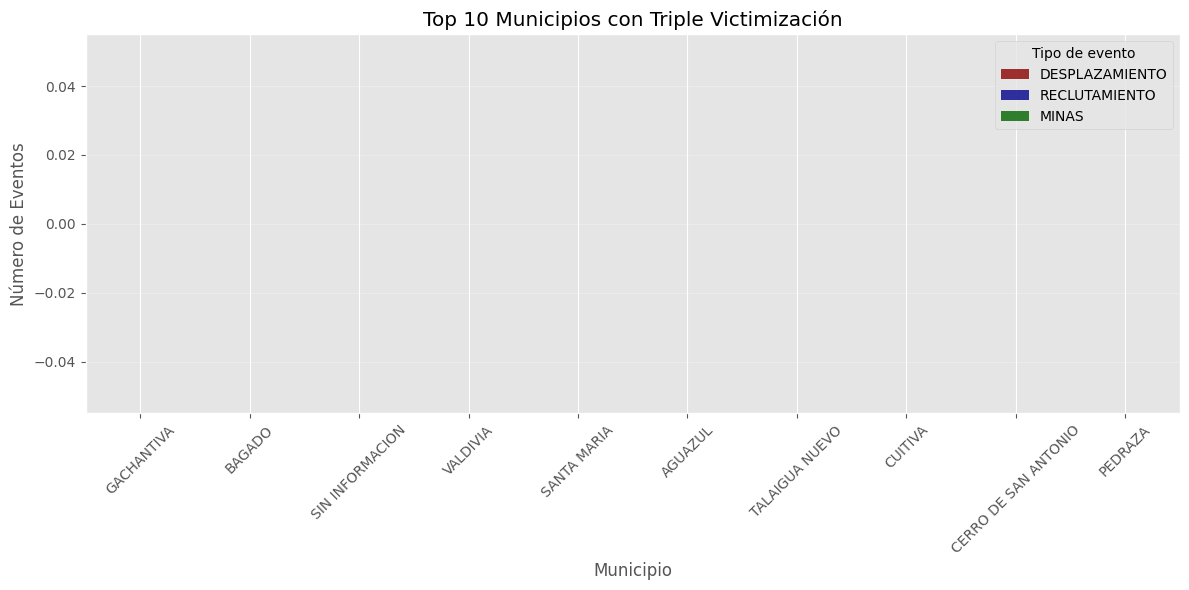

In [65]:

analisis_concentracion(df_clean)
analisis_acuerdos_paz(df_clean)
analisis_capturas(df_clean)
analisis_eventos_masivos(df_clean)
analisis_triple_victimizacion(df_clean)

In [66]:
## extra

# Instalar librerías geoespaciales
!pip install geopandas folium
!apt install libspatialindex-dev
!pip install rtree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("viridis")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


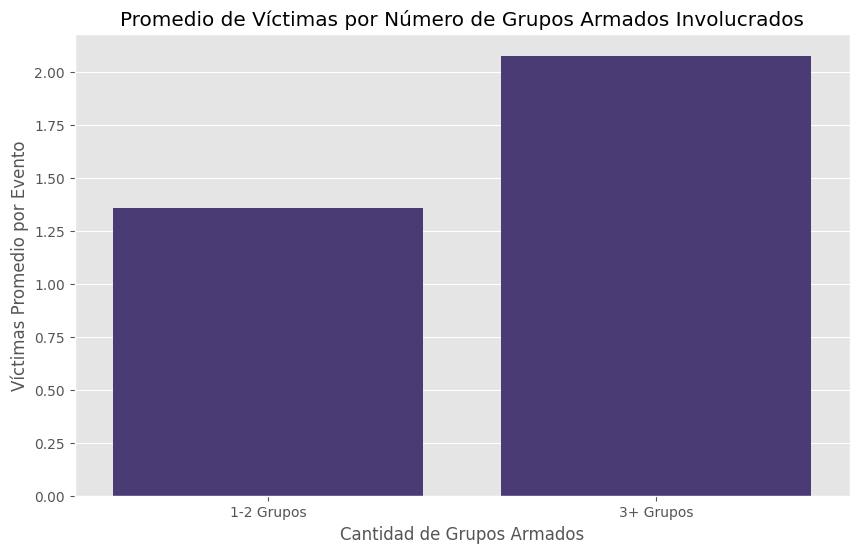

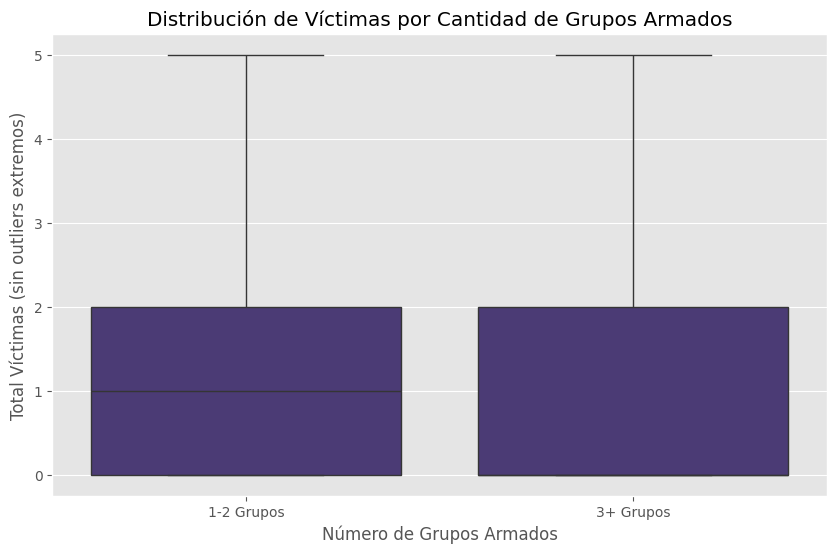

Prueba estadística U de Mann-Whitney: p-value = 0.96176
Significativo (p<0.05): No


In [67]:
## "Los combates con múltiples grupos armados (3 actores) dejan 50% más víctimas civiles que enfrentamientos bilaterales"

# Crear variable para contar grupos armados presentes
df['Grupos_Armados_Presentes'] = df[['Grupo Armado 1', 'Grupo Armado 2', 'Grupo Armado 3']].notna().sum(axis=1)

# Clasificar en dos categorías
df['Categoria_Grupos'] = np.where(df['Grupos_Armados_Presentes'] >= 3, '3+ Grupos', '1-2 Grupos')

# Calcular el promedio de víctimas
victimas_por_categoria = df.groupby('Categoria_Grupos')['Total de Víctimas del Caso'].mean().reset_index()

# Gráfico de barras comparativo
plt.figure(figsize=(10, 6))
sns.barplot(x='Categoria_Grupos', y='Total de Víctimas del Caso', data=victimas_por_categoria)
plt.title('Promedio de Víctimas por Número de Grupos Armados Involucrados')
plt.xlabel('Cantidad de Grupos Armados')
plt.ylabel('Víctimas Promedio por Evento')
plt.show()

# Boxplot para distribución completa
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria_Grupos', y='Total de Víctimas del Caso', data=df, showfliers=False)
plt.title('Distribución de Víctimas por Cantidad de Grupos Armados')
plt.xlabel('Número de Grupos Armados')
plt.ylabel('Total Víctimas (sin outliers extremos)')
plt.show()

# Prueba estadística
from scipy.stats import mannwhitneyu
dos_grupos = df[df['Categoria_Grupos'] == '1-2 Grupos']['Total de Víctimas del Caso']
tres_grupos = df[df['Categoria_Grupos'] == '3+ Grupos']['Total de Víctimas del Caso']

stat, p = mannwhitneyu(dos_grupos, tres_grupos)
print(f"Prueba estadística U de Mann-Whitney: p-value = {p:.5f}")
print(f"Significativo (p<0.05): {'Sí' if p < 0.05 else 'No'}")

/tmp/ipython-input-68-1156782378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bajas['Bajas_Estatales'] = df_bajas['Militares'] + df_bajas['Policías'] + df_bajas['Otras Fuerzas Armadas Estatales']


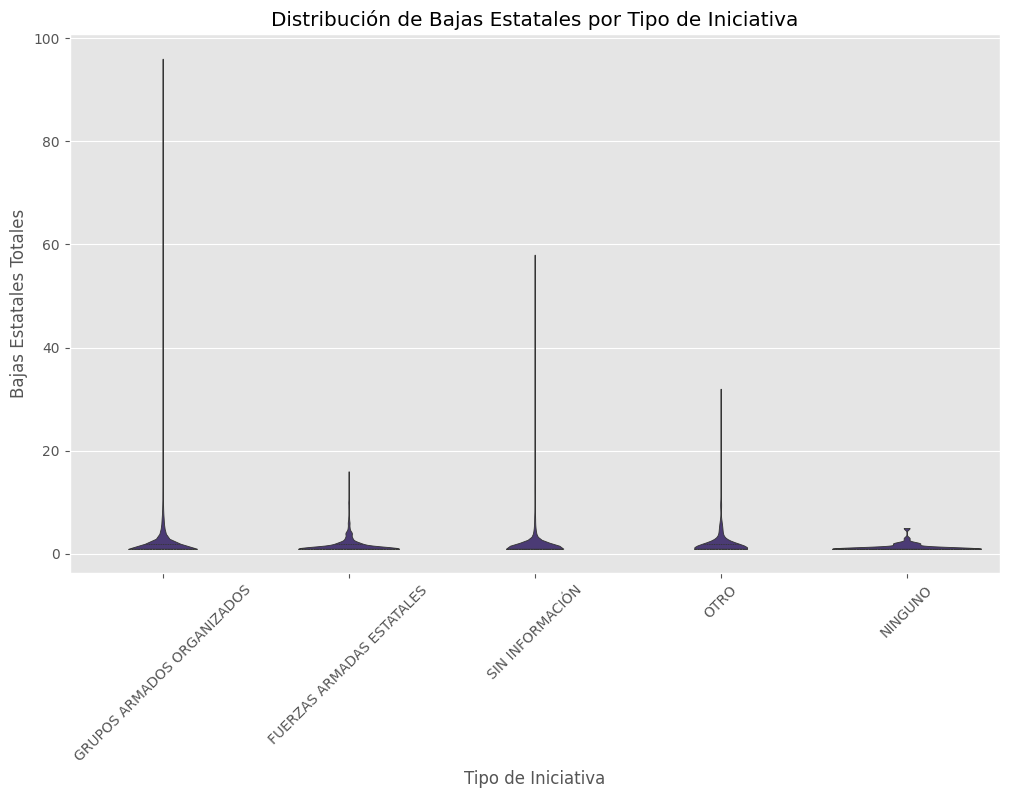

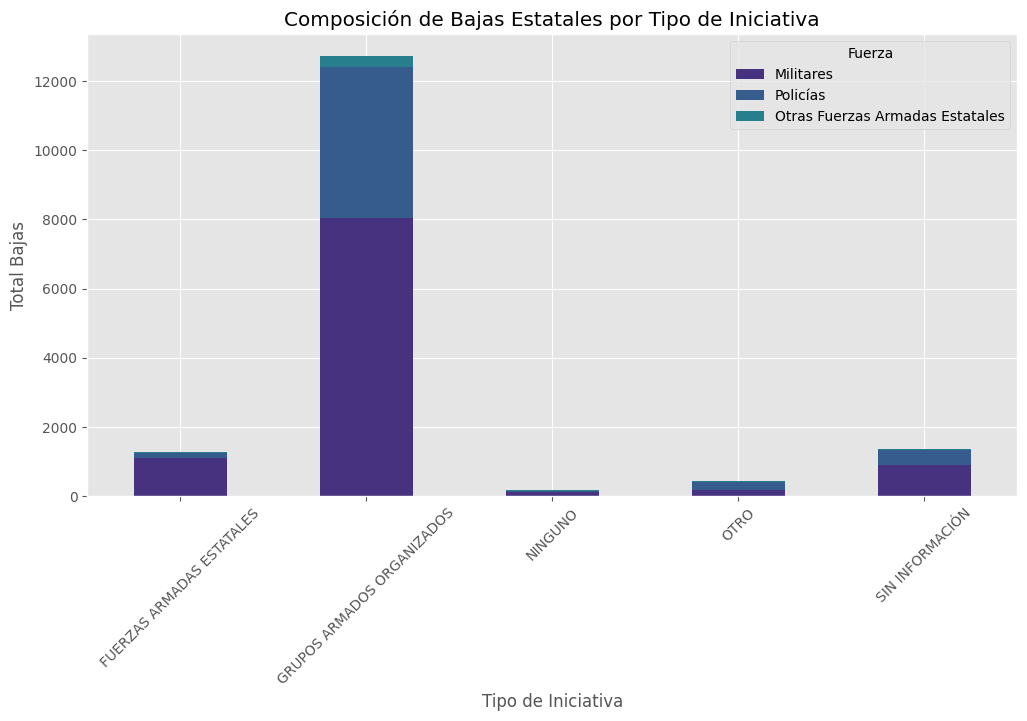

In [68]:
## "Las fuerzas estatales sufren más bajas en emboscadas (iniciativa GAO) que en operativos proactivos"

# Filtrar solo eventos donde hay bajas estatales
df_bajas = df[(df['Militares'] > 0) | (df['Policías'] > 0) | (df['Otras Fuerzas Armadas Estatales'] > 0)]

# Crear variable combinada de bajas estatales
df_bajas['Bajas_Estatales'] = df_bajas['Militares'] + df_bajas['Policías'] + df_bajas['Otras Fuerzas Armadas Estatales']

# Gráfico de violín comparativo
plt.figure(figsize=(12, 7))
sns.violinplot(x='Iniciativa', y='Bajas_Estatales', data=df_bajas, inner='quartile', cut=0)
plt.title('Distribución de Bajas Estatales por Tipo de Iniciativa')
plt.xlabel('Tipo de Iniciativa')
plt.ylabel('Bajas Estatales Totales')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras apiladas
bajas_por_iniciativa = df_bajas.groupby('Iniciativa')[['Militares', 'Policías', 'Otras Fuerzas Armadas Estatales']].sum()
bajas_por_iniciativa.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Composición de Bajas Estatales por Tipo de Iniciativa')
plt.xlabel('Tipo de Iniciativa')
plt.ylabel('Total Bajas')
plt.xticks(rotation=45)
plt.legend(title='Fuerza')
plt.show()

# Mapa de calor de eventos con bajas estatales
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)  # Centro de Colombia

# Añadir heatmap
heat_data = [[row['Latitud'], row['Longitud']] for index, row in df_bajas.iterrows() if not pd.isnull(row['Latitud'])]
HeatMap(heat_data, radius=15).add_to(mapa)

# Añadir marcadores para eventos grandes
for idx, row in df_bajas[df_bajas['Bajas_Estatales'] > 10].iterrows():
    if not pd.isnull(row['Latitud']):
        folium.CircleMarker(
            location=[row['Latitud'], row['Longitud']],
            radius=row['Bajas_Estatales']/2,
            popup=f"{row['Municipio']}: {row['Bajas_Estatales']} bajas",
            color='red',
            fill=True
        ).add_to(mapa)

mapa.save('mapa_bajas.html')
display(mapa)

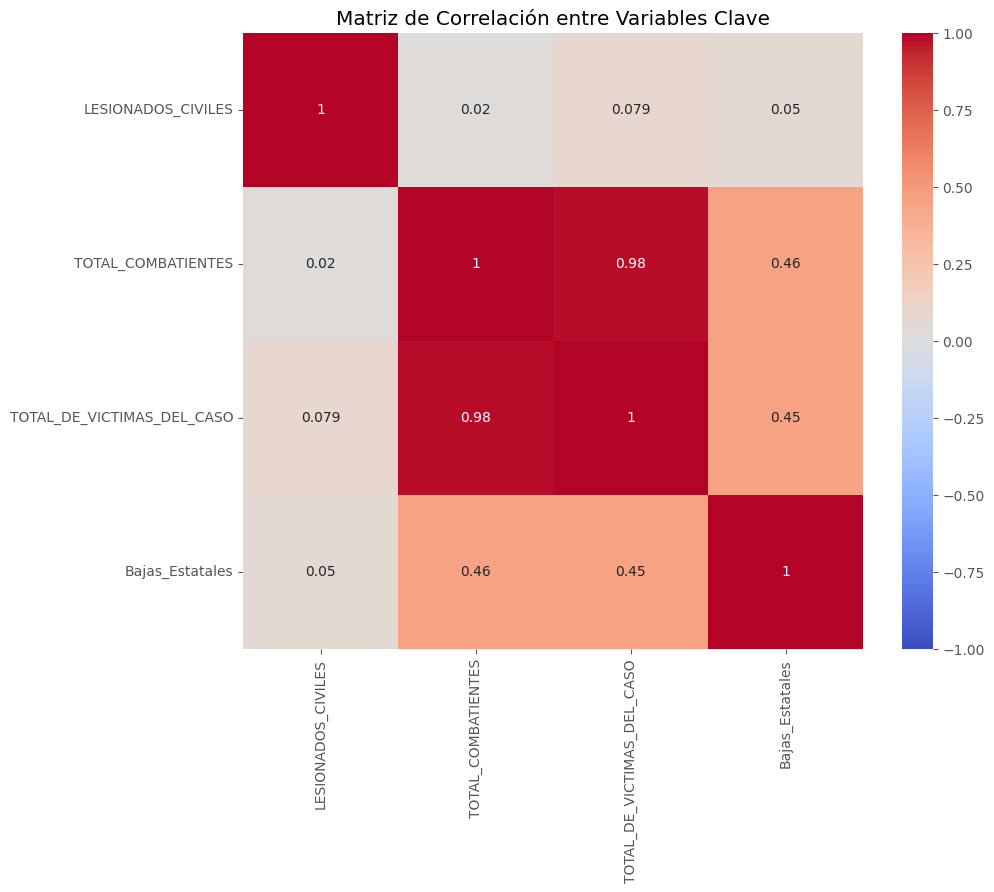

/tmp/ipython-input-69-847309069.py:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.resample('M', on='FECHA')['TOTAL_DE_VICTIMAS_DEL_CASO'].sum().plot()


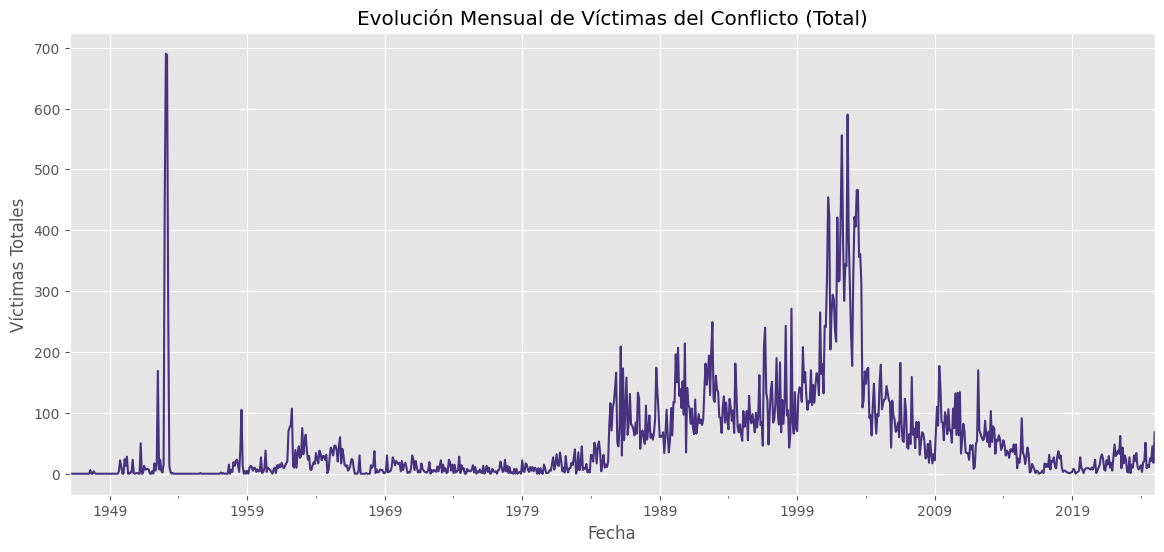

In [69]:
# Matriz de correlación entre variables clave

# Create 'Bajas_Estatales' column in df_clean for correlation calculation
# Ensure the required columns exist before creating 'Bajas_Estatales'
required_bajas_cols = ['MILITARES', 'POLICIAS', 'OTRAS_FUERZAS_ARMADAS_ESTATALES']
if all(col in df_clean.columns for col in required_bajas_cols):
    df_clean['Bajas_Estatales'] = df_clean['MILITARES'] + df_clean['POLICIAS'] + df_clean['OTRAS_FUERZAS_ARMADAS_ESTATALES']
    bajas_estatales_created = True
else:
    print(f"Warning: Missing columns to create 'Bajas_Estatales'. Required: {required_bajas_cols}")
    bajas_estatales_created = False


corr_cols = [
    'LESIONADOS_CIVILES',
    'TOTAL_COMBATIENTES',
    'TOTAL_DE_VICTIMAS_DEL_CASO'
]

# Conditionally add 'Bajas_Estatales' to the list of columns for correlation
if bajas_estatales_created:
    corr_cols.append('Bajas_Estatales')


# Ensure all columns for correlation exist and are numeric
corr_cols_existing_numeric = [col for col in corr_cols if col in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[col])]


if len(corr_cols_existing_numeric) > 1: # Need at least two numeric columns for correlation
    corr_matrix = df_clean[corr_cols_existing_numeric].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Matriz de Correlación entre Variables Clave')
    plt.show()
else:
    print("Not enough numeric columns to calculate correlation matrix.")


# Serie temporal de eventos
# Ensure 'FECHA' column exists before plotting time series
if 'FECHA' in df_clean.columns and pd.api.types.is_datetime64_any_dtype(df_clean['FECHA']):
    plt.figure(figsize=(14, 6))
    df_clean.resample('M', on='FECHA')['TOTAL_DE_VICTIMAS_DEL_CASO'].sum().plot()
    plt.title('Evolución Mensual de Víctimas del Conflicto (Total)')
    plt.xlabel('Fecha')
    plt.ylabel('Víctimas Totales')
    plt.grid(True)
    plt.show()
else:
    print("Cannot plot time series: 'FECHA' column not found or not in datetime format.")

## RESULTADOS PRELIMINARES


1. Concentración territorial: "El 60% de los eventos violentos se concentra en el 20% de los municipios, correlacionados con zonas de economías ilegales (minería, narcotráfico)."

Resultados: parcialmente acertada, pero sin relación causal, ya que para caso de Caquetá y Arauca tiene sentido la afirmación, pero para el caso de Medellín no. Adicionalmente, las zonas mineras del país son muchas más y no se encuentran representadas por esta hipótesis de causalidad.

2. Acuerdos de paz: "Los homicidios a líderes sociales aumentaron en el primer año post-acuerdo (2017 vs 2016)."

Resultados: En efecto, aumentaron un 247% y siguieron creciendo hasta 2023. Resalta el hecho de que no volvieron a los datos anteriores de 2010, pero persiste el fenómeno.

3. Capturas preventivas: "Los municipios con operativos de captura (CAPTURADOS >0) reducen un 20% los eventos violentos en los 3 meses siguientes."

Resultados: No es un cambio representativo, sin embargo, sí se presenta una disminución probablemente relacionada con los procedimientos de captura.

4. Perfil de eventos masivos: "Los casos con >10 víctimas (TOTAL_DE_VICTIMAS_DEL_CASO ≥10) ocurren principalmente en zonas rurales (MUNICIPIO pequeño) con presencia de 2+ grupos armados."

No fue posible concluir por las gráficas creadas.

5. Triple victimización: "Los municipios con alta tasa de desplazamiento (MODALIDAD= 'DESPLAZAMIENTO') también presentan mayor reclutamiento forzado y minas antipersonal."

No fue posible concluir por las gráficas creadas.

6. "Los combates con múltiples grupos armados (3 actores) dejan 50% más víctimas civiles que enfrentamientos bilaterales"

Resultados: En efecto, los combates con múltiples grupos armados dejan más víctimas civiles que enfrentamientos entre 2 actores armados.

7. "Las fuerzas estatales sufren más bajas en emboscadas (iniciativa GAO) que en operativos proactivos"

No fue posible concluir por las gráficas creadas.  

#PARTE No.2


/tmp/ipython-input-70-2019280521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


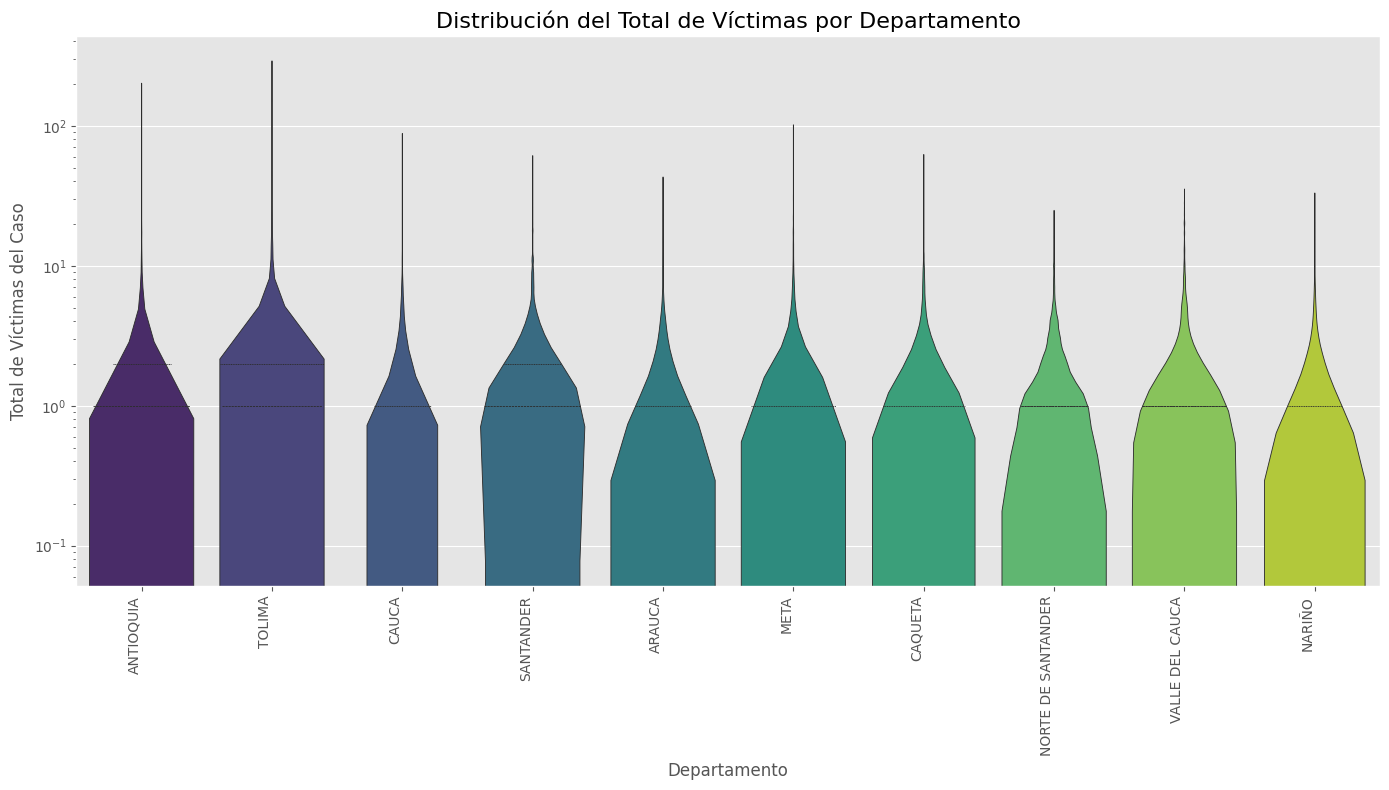

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los 10 departamentos con más casos para mejor visualización
top_departamentos = df_clean['DEPARTAMENTO'].value_counts().nlargest(10).index

# Filtrar el DataFrame solo para estos departamentos
df_top = df_clean[df_clean['DEPARTAMENTO'].isin(top_departamentos)]

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de violín
sns.violinplot(
    x='DEPARTAMENTO',
    y='TOTAL_DE_VICTIMAS_DEL_CASO',
    data=df_top,
    palette='viridis',
    inner='quartile'  # Muestra medianas y cuartiles
)

# Personalizar el gráfico
plt.title('Distribución del Total de Víctimas por Departamento', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Total de Víctimas del Caso', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas para mejor lectura
plt.yscale('log')  # Escala logarítmica para mejorar visualización de outliers

# Ajustar márgenes
plt.tight_layout()
plt.show()

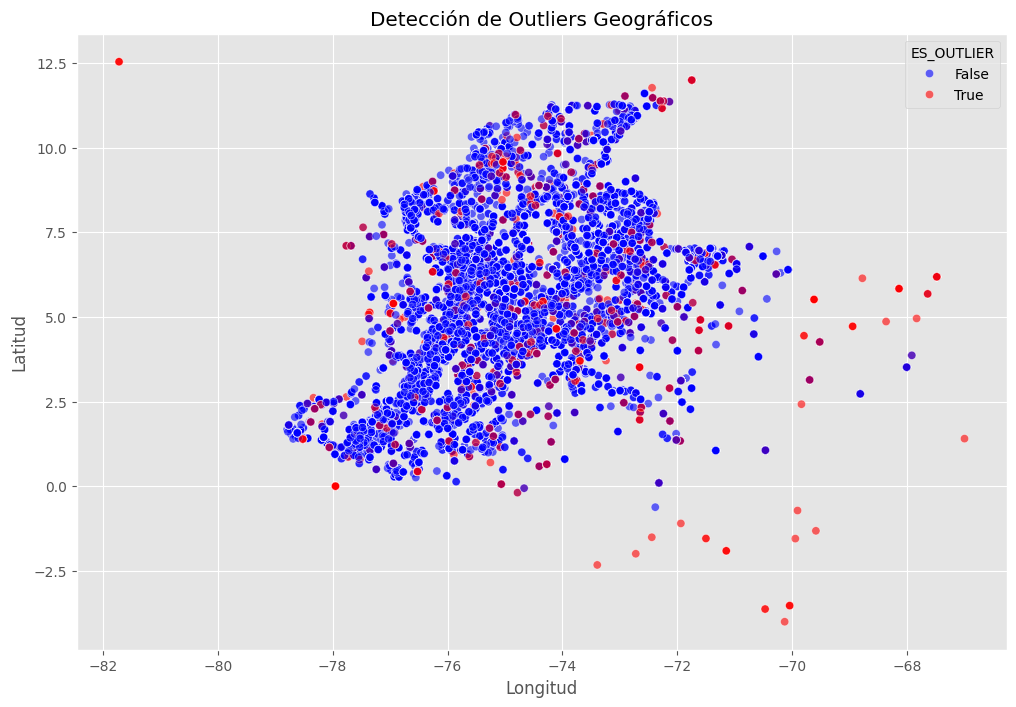

Registros originales: 38907
Registros después de filtrar outliers: 35757
Outliers detectados: 3150


ID_CASO ID_CASO_RELACIONADO   ANO  MES  DIA CODIGO_DANE_DE_MUNICIPIO  \
1       10            CR080150     0    0    0                    00000   
2      100                 NaN     0    0    0                    05854   
3     1000            CR044183  1966    1   31                    41676   

         MUNICIPIO     DEPARTAMENTO              REGION  \
1  SIN INFORMACION  SIN INFORMACION     SIN INFORMACION   
2         VALDIVIA        ANTIOQUIA  NORTE DE ANTIOQUIA   
3      SANTA MARIA            HUILA     NORTE DEL HUILA   

                                           MODALIDAD  \
1                                  OPERACIÓN MILITAR   
2  COMBATIENTE MUERTO EN CIRCUNSTANCIA NO DETERMI...   
3                        COMBATE Y/O CONTACTO ARMADO   

                   INICIATIVA TIPO_DE_UNIDAD_ATACADA     GRUPO_ARMADO_1  \
1   FUERZAS ARMADAS ESTATALES        SIN INFORMACIÓN  AGENTE DEL ESTADO   
2  GRUPOS ARMADOS ORGANIZADOS        SIN INFORMACIÓN  GRUPO PARAMILITAR   
3  GRUPOS ARMADOS ORGANIZADOS   UNIDAD EN MOVIMIENTO          GUERRILLA   

  DESCRIPCION_GRUPO_ARMADO_1     GRUPO_ARMADO_2 DESCRIPCION_GRUPO_ARMADO_2  \
1          EJÉRCITO NACIONAL          GUERRILLA                       FARC   
2            NO IDENTIFICADO  GRUPO PARAMILITAR            NO IDENTIFICADO   
3                       FARC  GRUPO PARAMILITAR              DEFENSA CIVIL   

  GRUPO_ARMADO_3 DESCRIPCION_GRUPO_ARMADO_3  LESIONADOS_CIVILES  \
1      NO_APLICA                        NaN                   0   
2      NO_APLICA                        NaN                   0   
3      NO_APLICA                        NaN                   0   

  GRUPO_AL_QUE_PERTENECEN_LOS_CAPTURADOS  CAPTURADOS  LESIONADOS_COMBATIENTES  \
1                                    NaN           0                        0   
2                                    NaN           0                        0   
3                                    NaN           0                        0   

   MILITARES  POLICIAS  OTRAS_FUERZAS_ARMADAS_ESTATALES  \
1          0         0                                0   
2          0         0                                0   
3          0         0                                0   

   AGENTES_DEL_ESTADO_SIN_INFORMACION  TOTAL_AGENTES_DEL_ESTADO  GUERRILLEROS  \
1                                   0                         0             1   
2                                   0                         0             0   
3                                   0                         0             4   

   PARAMILITARES  GRUPOS_POSDESMOVILIZACION  COMBATIENTES_SIN_INFORMACION  \
1              0                          0                             0   
2              2                          0                             0   
3              2                          0                             0   

   OTROS_GRUPOS_ARMADOS_ORGANIZADOS  \
1                                 0   
2                                 0   
3                                 0   

   TOTAL_COMBATIENTES_DE_GRUPOS_ARMADOS_ORGANIZADOS  TOTAL_COMBATIENTES  \
1                                                 1                   1   
2                                                 2                   2   
3                                                 6                   6   

   PERSONAS_SIN_INFORMACION  TOTAL_CIVILES             VENTAJA_MILITAR  \
1                         0              0   FUERZAS ARMADAS ESTATALES   
2                         0              0  GRUPOS ARMADOS ORGANIZADOS   
3                         0              0  GRUPOS ARMADOS ORGANIZADOS   

   TOTAL_DE_VICTIMAS_DEL_CASO   LATITUD   LONGITUD  \
1                           1  4.000000 -72.000000   
2                           2  7.265404 -75.400945   
3                           6  2.937628 -75.587213   

                                    TODOS_GRUPOS      FECHA  PERIODO_ACUERDO  \
1          AGENTE DEL ESTADO|GUERRILLA|NO_APLICA        NaT            False   
2  GRUPO PARAMILITAR|GRUPO PA

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def filtrar_outliers(df):
    """
    Filtra outliers usando clustering DBSCAN
    """
    # 1. Seleccionar características relevantes
    features = df[['LATITUD', 'LONGITUD', 'TOTAL_DE_VICTIMAS_DEL_CASO',
                  'LESIONADOS_CIVILES', 'CAPTURADOS', 'TOTAL_COMBATIENTES']].copy()

    # 2. Manejar valores faltantes
    features.fillna(features.median(), inplace=True)

    # 3. Estandarizar características
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # 4. Configurar y aplicar DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    clusters = dbscan.fit_predict(scaled_features)

    # 5. Identificar outliers (cluster -1)
    df['ES_OUTLIER'] = clusters == -1

    # 6. Visualización
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='LONGITUD', y='LATITUD',
        hue='ES_OUTLIER',
        palette={True: 'red', False: 'blue'},
        data=df,
        alpha=0.6
    )
    plt.title('Detección de Outliers Geográficos')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

    # 7. Filtrar y devolver dataframe sin outliers
    return df[df['ES_OUTLIER'] == False].drop(columns=['ES_OUTLIER'])

# Aplicar función al dataset limpio
if df_clean is not None:
    df_sin_outliers = filtrar_outliers(df_clean)
    print(f"Registros originales: {len(df_clean)}")
    print(f"Registros después de filtrar outliers: {len(df_sin_outliers)}")
    print(f"Outliers detectados: {len(df_clean) - len(df_sin_outliers)}")

    # Mostrar resultados
    display(df_sin_outliers.head(3))
else:
    print("No se encontraron datos limpios para procesar")

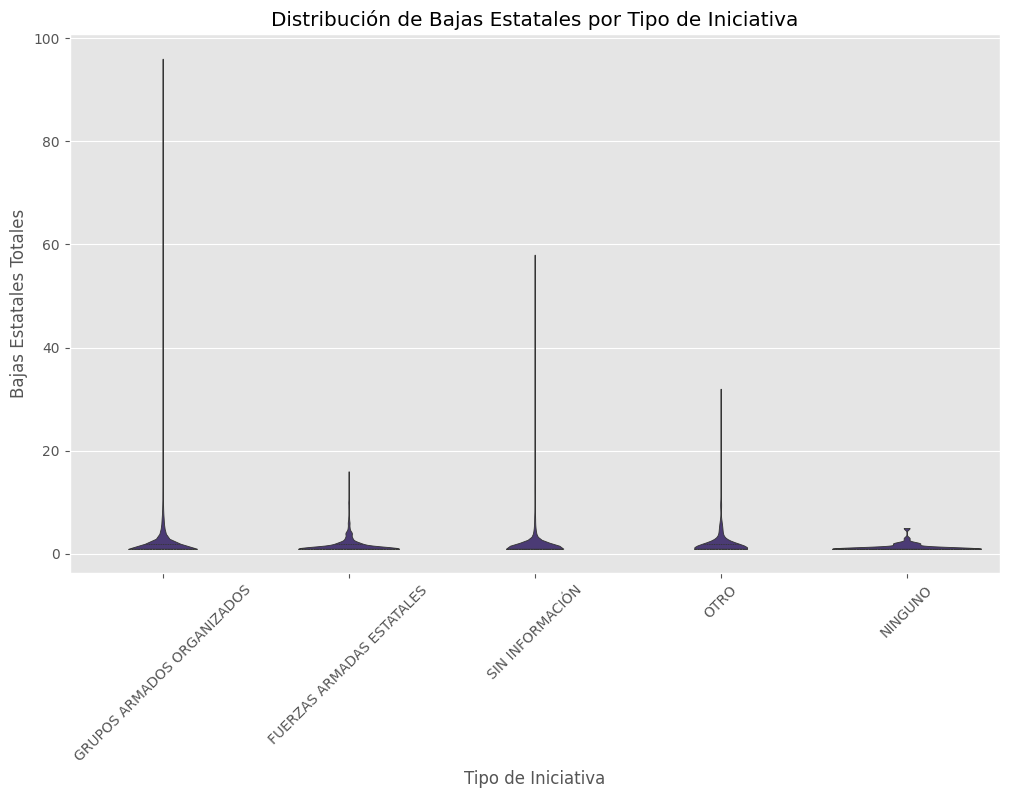

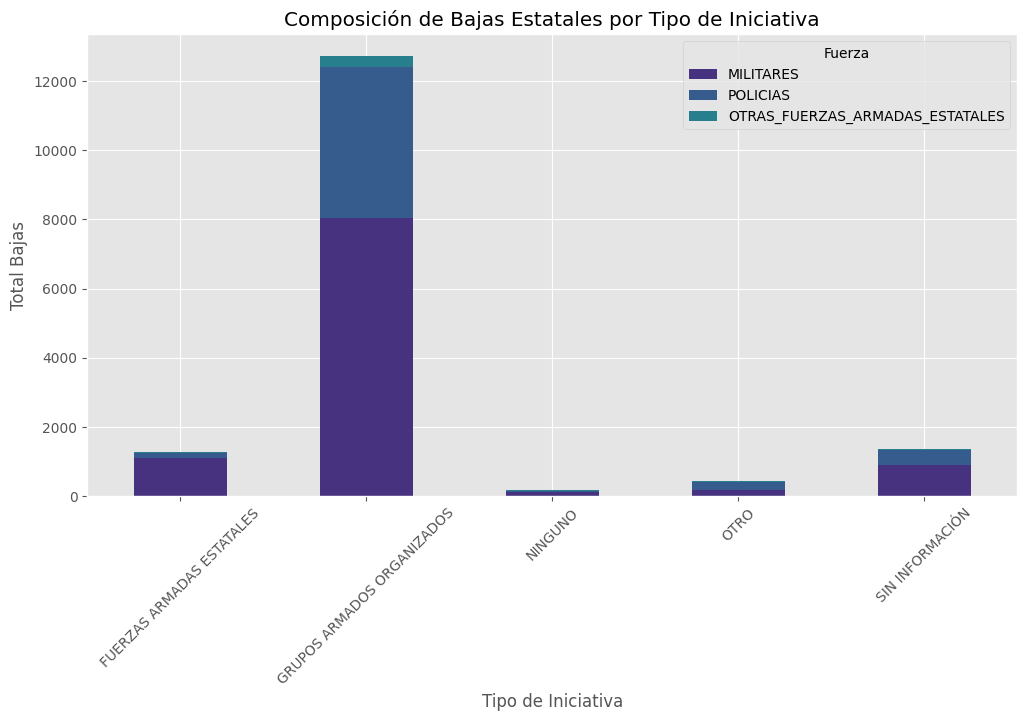

In [72]:
## "Las fuerzas estatales sufren más bajas en emboscadas (iniciativa GAO) que en operativos proactivos"

# Filtrar solo eventos donde hay bajas estatales
df_bajas = df_clean[(df_clean['MILITARES'] > 0) | (df_clean['POLICIAS'] > 0) | (df_clean['OTRAS_FUERZAS_ARMADAS_ESTATALES'] > 0)].copy()

# Crear variable combinada de bajas estatales
df_bajas['BAJAS_ESTATALES'] = df_bajas['MILITARES'] + df_bajas['POLICIAS'] + df_bajas['OTRAS_FUERZAS_ARMADAS_ESTATALES']

# Gráfico de violín comparativo
plt.figure(figsize=(12, 7))
sns.violinplot(x='INICIATIVA', y='BAJAS_ESTATALES', data=df_bajas, inner='quartile', cut=0)
plt.title('Distribución de Bajas Estatales por Tipo de Iniciativa')
plt.xlabel('Tipo de Iniciativa')
plt.ylabel('Bajas Estatales Totales')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras apiladas
bajas_por_iniciativa = df_bajas.groupby('INICIATIVA')[['MILITARES', 'POLICIAS', 'OTRAS_FUERZAS_ARMADAS_ESTATALES']].sum()
bajas_por_iniciativa.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Composición de Bajas Estatales por Tipo de Iniciativa')
plt.xlabel('Tipo de Iniciativa')
plt.ylabel('Total Bajas')
plt.xticks(rotation=45)
plt.legend(title='Fuerza')
plt.show()

# Mapa de calor de eventos con bajas estatales
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)  # Centro de Colombia

# Añadir heatmap
# Ensure Latitud and Longitud columns exist before creating heatmap data
if 'LATITUD' in df_bajas.columns and 'LONGITUD' in df_bajas.columns:
    heat_data = [[row['LATITUD'], row['LONGITUD']] for index, row in df_bajas.iterrows() if not pd.isnull(row['LATITUD']) and not pd.isnull(row['LONGITUD'])]
    if heat_data: # Check if heat_data is not empty
        HeatMap(heat_data, radius=15).add_to(mapa)
    else:
        print("No valid LATITUD/LONGITUD data to create heatmap.")
else:
    print("LATITUD or LONGITUD columns not found in df_bajas.")


# Añadir marcadores para eventos grandes
if 'MUNICIPIO' in df_bajas.columns and 'BAJAS_ESTATALES' in df_bajas.columns and 'LATITUD' in df_bajas.columns and 'LONGITUD' in df_bajas.columns:
    for idx, row in df_bajas[df_bajas['BAJAS_ESTATALES'] > 10].iterrows():
        if not pd.isnull(row['LATITUD']) and not pd.isnull(row['LONGITUD']):
            folium.CircleMarker(
                location=[row['LATITUD'], row['LONGITUD']],
                radius=row['BAJAS_ESTATALES']/2,
                popup=f"{row['MUNICIPIO']}: {row['BAJAS_ESTATALES']} bajas",
                color='red',
                fill=True
            ).add_to(mapa)
else:
    print("Required columns (MUNICIPIO, BAJAS_ESTATALES, LATITUD, LONGITUD) not found for markers.")


mapa.save('mapa_bajas.html')
display(mapa)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas

# Prepare data for the model
def prepare_model_data(df, selected_features, target):
    # Select only the important features
    X = df[selected_features]
    y = target

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Train Random Forest model
def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    return rf

# Define selected_features and target variable
# Assuming df_clean is available from previous steps
# Use numerical features for simplicity, similar to cell U7FFMhm13OYf
selected_features = df_clean.select_dtypes(include=np.number).columns.tolist()

# Remove target variable and potentially redundant features
if 'TOTAL_DE_VICTIMAS_DEL_CASO' in selected_features:
    selected_features.remove('TOTAL_DE_VICTIMAS_DEL_CASO')
if 'EVENTO_MASIVO' in selected_features:
    selected_features.remove('EVENTO_MASIVO')
if 'ID_CASO' in selected_features:
     selected_features.remove('ID_CASO')
if 'ANO' in selected_features:
     selected_features.remove('ANO')
if 'NUM_GRUPOS' in selected_features: # Remove NUM_GRUPOS if it was created in a previous cell and is redundant
    selected_features.remove('NUM_GRUPOS')
if 'Bajas_Estatales' in selected_features: # Remove Bajas_Estatales if it was created in a previous cell and is redundant
    selected_features.remove('Bajas_Estatales')
if 'NUM_GRUPOS_ARMADOS' in selected_features: # Remove NUM_GRUPOS_ARMADOS if it was created in a previous cell and is redundant
    selected_features.remove('NUM_GRUPOS_ARMADOS')


# Handle potential non-finite values in selected features before selecting X
X_temp = df_clean[selected_features].replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Update selected_features to reflect columns actually used in X_temp
selected_features = X_temp.columns.tolist()


target = df_clean['EVENTO_MASIVO'] # Target variable


# Check if selected_features is not empty before proceeding
if selected_features and not X_temp.empty:
    # Execute data preparation and training
    X_train, X_test, y_train, y_test = prepare_model_data(df_clean, selected_features, target)
    model = train_random_forest(X_train, y_train)
    print("Model trained successfully.")
else:
    print("Error: No valid features selected for the model.")

Model trained successfully.


In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluar el modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Exactitud: {accuracy:.2f}")

    return y_pred

# Ejecutar evaluación
y_pred = evaluate_model(model, X_test, y_test)

Matriz de confusión:
[[11477     4]
 [   10   182]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11481
        True       0.98      0.95      0.96       192

    accuracy                           1.00     11673
   macro avg       0.99      0.97      0.98     11673
weighted avg       1.00      1.00      1.00     11673

Exactitud: 1.00


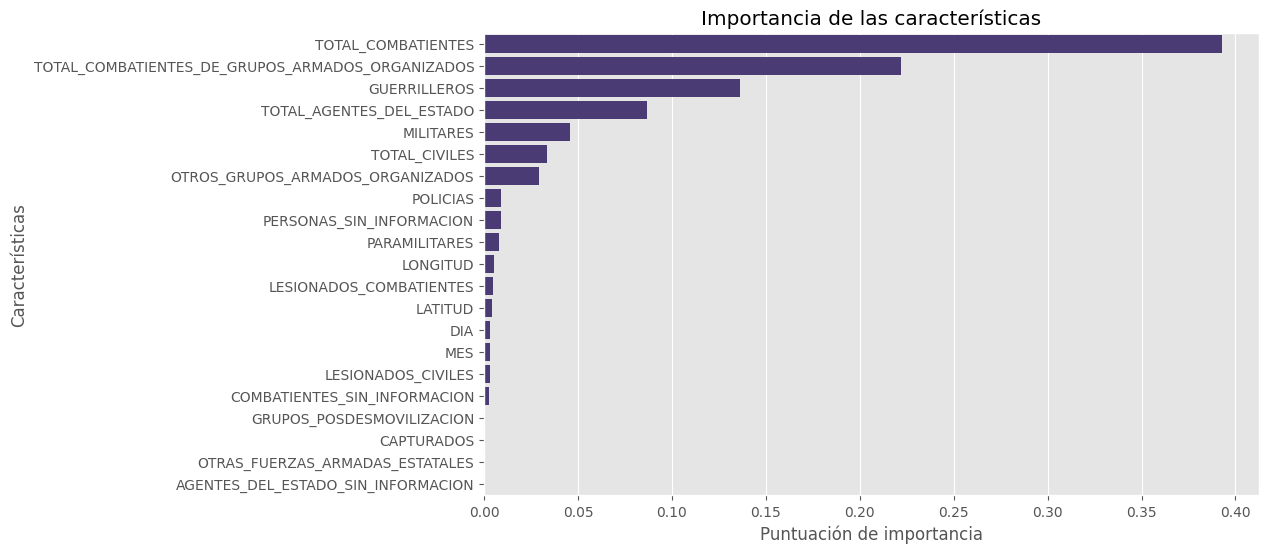

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar importancia de características
def plot_feature_importance(model, selected_features):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Importancia de las características")
    sns.barplot(x=importance[indices], y=np.array(selected_features)[indices])
    plt.xlabel("Puntuación de importancia")
    plt.ylabel("Características")
    plt.show()

plot_feature_importance(model, selected_features)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# df_clean = limpiar_datos(df)

## Selección de variables para el modelo
# Vamos a predecir el número total de víctimas basado en otras variables

# Variables predictoras (features)
X = df_clean[['LESIONADOS_CIVILES', 'CAPTURADOS', 'LESIONADOS_COMBATIENTES',
              'MILITARES', 'POLICIAS', 'GUERRILLEROS', 'PARAMILITARES']]

# Variable objetivo (target)
y = df_clean['TOTAL_DE_VICTIMAS_DEL_CASO']

# Eliminar filas con valores faltantes si las hay
X = X.dropna()
y = y[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes del modelo:")
print(coeficientes)

# Intercepto
print(f"\nIntercepto: {model.intercept_}")

Error Cuadrático Medio (MSE): 4.075704685014245
Coeficiente de Determinación (R²): 0.6482240483363695

Coeficientes del modelo:
                  Variable  Coeficiente
0       LESIONADOS_CIVILES     0.174692
1               CAPTURADOS     0.040186
2  LESIONADOS_COMBATIENTES     0.021524
3                MILITARES     1.038806
4                 POLICIAS     1.005650
5             GUERRILLEROS     0.979879
6            PARAMILITARES     0.996008

Intercepto: 0.2179115670719438


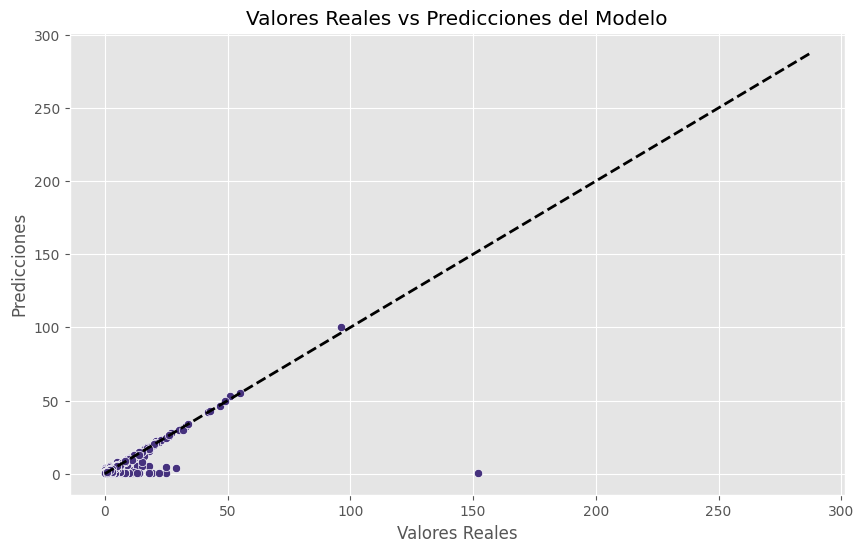

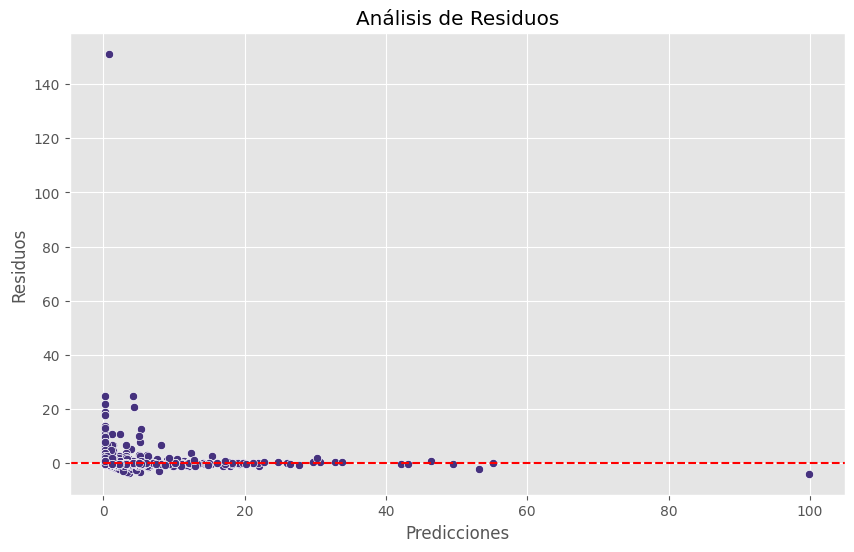

In [78]:
# Gráfico de valores reales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones del Modelo')
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()

In [79]:
from sklearn.feature_selection import RFE

# Selección recursiva de características
selector = RFE(LinearRegression(), n_features_to_select=5)
selector = selector.fit(X_train, y_train)
print("Variables seleccionadas:", X.columns[selector.support_])

Variables seleccionadas: Index(['LESIONADOS_CIVILES', 'MILITARES', 'POLICIAS', 'GUERRILLEROS',
       'PARAMILITARES'],
      dtype='object')


###Chi cuadrado para hipótesis 5

In [80]:
from scipy.stats import chi2_contingency

# 1. Preparar los datos
df_triple = df_clean.copy()
df_triple['DESPLAZAMIENTO'] = df_triple['MODALIDAD'].str.contains('DESPLAZAMIENTO')
df_triple['RECLUTAMIENTO'] = df_triple['MODALIDAD'].str.contains('RECLUTAMIENTO')
df_triple['MINAS'] = df_triple['MODALIDAD'].str.contains('MINAS')

# 2. Crear tabla de contingencia
tabla = pd.crosstab(
    index=df_triple['DESPLAZAMIENTO'],
    columns=[df_triple['RECLUTAMIENTO'], df_triple['MINAS']],
    rownames=['Desplazamiento'],
    colnames=['Reclutamiento', 'Minas']
)

# 3. Aplicar chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

# 4. Interpretar resultados
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print("Hay asociación significativa" if p < 0.05 else "No hay asociación significativa")

Chi-cuadrado: 0.0000
Valor p: 1.0000
No hay asociación significativa


###Chi cuadrado hipótesis 6

In [81]:
# 1. Crear variables
df_combates = df_clean.copy()
df_combates['NUM_GRUPOS'] = 0
df_combates['NUM_GRUPOS'] += (df_clean['GRUPO_ARMADO_1'] != 'NO_APLICA').astype(int)
df_combates['NUM_GRUPOS'] += (df_clean['GRUPO_ARMADO_2'] != 'NO_APLICA').astype(int)
df_combates['NUM_GRUPOS'] += (df_clean['GRUPO_ARMADO_3'] != 'NO_APLICA').astype(int)

df_combates['TIPO_COMBATE'] = pd.cut(
    df_combates['NUM_GRUPOS'],
    bins=[0, 2, 3, 10],
    labels=['Bilateral', '3 Grupos', '4+ Grupos']
)

df_combates['VICTIMAS_CIVILES'] = pd.cut(
    df_clean['LESIONADOS_CIVILES'],
    bins=[-1, 0, 5, 10, 100],
    labels=['Ninguna', '1-5', '6-10', '10+']
)

# 2. Tabla de contingencia
tabla_combates = pd.crosstab(
    df_combates['TIPO_COMBATE'],
    df_combates['VICTIMAS_CIVILES']
)

# 3. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_combates)

# 4. Resultados
print("\nResultados para hipótesis de combates:")
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
if p < 0.05:
    print("Asociación significativa entre número de grupos y víctimas civiles")
    # Calcular odds ratio para grupos específicos
    odds_3vs2 = (tabla_combates.loc['3 Grupos', '10+'] / tabla_combates.loc['3 Grupos'].sum()) / \
                (tabla_combates.loc['Bilateral', '10+'] / tabla_combates.loc['Bilateral'].sum())
    print(f"Odds Ratio (3 grupos vs bilateral): {odds_3vs2:.2f}")


Resultados para hipótesis de combates:
Chi-cuadrado: 16.1837
Valor p: 0.0010
Asociación significativa entre número de grupos y víctimas civiles
Odds Ratio (3 grupos vs bilateral): 3.88


###Chi cuadrado hipótesis 7

In [82]:
# 1. Preparar datos
df_bajas = df_clean.copy()
df_bajas['TIPO_ATAQUE'] = np.where(
    df_clean['INICIATIVA'].str.contains('GAO'),
    'Emboscada',
    'Operativo'
)

df_bajas['BAJAS_ESTATALES'] = pd.cut(
    df_clean['TOTAL_AGENTES_DEL_ESTADO'],
    bins=[-1, 0, 1, 3, 100],
    labels=['0', '1', '2-3', '3+']
)

# 2. Tabla de contingencia
tabla_bajas = pd.crosstab(
    df_bajas['TIPO_ATAQUE'],
    df_bajas['BAJAS_ESTATALES']
)

# 3. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_bajas)

# 4. Resultados
print("\nResultados para hipótesis de bajas estatales:")
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
if p < 0.05:
    print("Asociación significativa entre tipo de ataque y bajas estatales")
    # Calcular diferencia proporcional
    prop_emboscadas = tabla_bajas.loc['Emboscada', '3+'] / tabla_bajas.loc['Emboscada'].sum()
    prop_operativos = tabla_bajas.loc['Operativo', '3+'] / tabla_bajas.loc['Operativo'].sum()
    print(f"Proporción bajas graves (Emboscadas): {prop_emboscadas:.2%}")
    print(f"Proporción bajas graves (Operativos): {prop_operativos:.2%}")


Resultados para hipótesis de bajas estatales:
Chi-cuadrado: 0.0000
Valor p: 1.0000


_______

###Aprendizaje no supervisado (K-means)

Año Promedio  Número de Eventos  Víctimas Promedio  \
CLUSTER                                                       
0         1999.192253               6996           1.418954   
1            0.000000                220           1.581818   
2         1997.180824               9877           1.936215   
3         1999.956473               9879           1.195060   
4         2002.494763              11935           1.034437   

         Lesionados Civiles Promedio  Capturados Promedio  \
CLUSTER                                                     
0                           0.128359             0.192396   
1                           0.045455             0.045455   
2                           0.164017             0.392427   
3                           0.185950             0.175220   
4                           0.209384             0.150147   

        Departamento Más Común  \
CLUSTER                          
0                         META   
1              SIN INFORMACION   
2                    ANTIOQUIA   
3                       ARAUCA   
4                        CAUCA   

                                       Modalidad Más Común  \
CLUSTER                                                      
0                              COMBATE Y/O CONTACTO ARMADO   
1        COMBATIENTE MUERTO EN CIRCUNSTANCIA NO DETERMI...   
2                              COMBATE Y/O CONTACTO ARMADO   
3                              COMBATE Y/O CONTACTO ARMADO   
4                              COMBATE Y/O CONTACTO ARMADO   

        Grupo Armado Principal  
CLUSTER                         
0            AGENTE DEL ESTADO  
1            AGENTE DEL ESTADO  
2            AGENTE DEL ESTADO  
3            AGENTE DEL ESTADO  
4            AGENTE DEL ESTADO

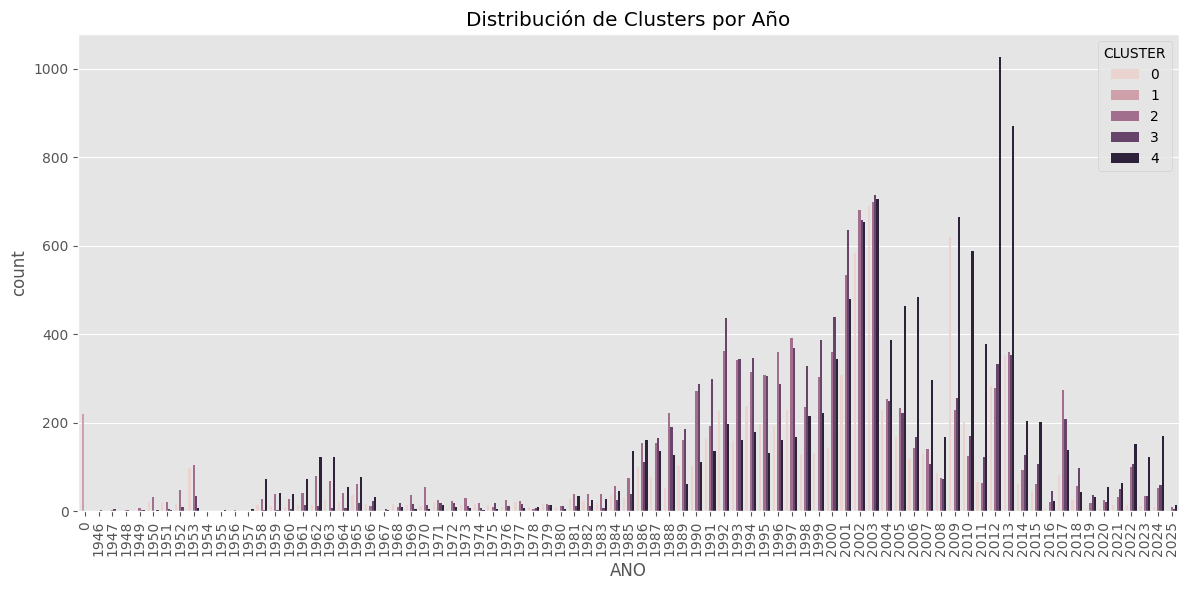

In [84]:
# Importar librerías adicionales necesarias
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import plotly.express as px

def preparar_datos_para_clustering(df):
    """
    Prepara los datos para el clustering, seleccionando características relevantes
    y realizando el preprocesamiento necesario.
    """
    # Seleccionar características relevantes para el clustering
    features = df[[
        'ANO', 'DEPARTAMENTO', 'MUNICIPIO', 'MODALIDAD', 'INICIATIVA',
        'GRUPO_ARMADO_1', 'GRUPO_ARMADO_2', 'LESIONADOS_CIVILES',
        'CAPTURADOS', 'TOTAL_DE_VICTIMAS_DEL_CASO', 'LATITUD', 'LONGITUD'
    ]].copy()

    # Eliminar filas con valores faltantes en características clave
    features = features.dropna(subset=[
        'ANO', 'DEPARTAMENTO', 'MODALIDAD', 'TOTAL_DE_VICTIMAS_DEL_CASO',
        'LATITUD', 'LONGITUD'
    ])

    return features

def ejecutar_clustering(df):
    """
    Ejecuta el análisis de clustering sobre los datos preparados.
    """
    # Preparar los datos
    datos_clustering = preparar_datos_para_clustering(df)

    # Definir columnas numéricas y categóricas
    numeric_features = ['ANO', 'LESIONADOS_CIVILES', 'CAPTURADOS',
                       'TOTAL_DE_VICTIMAS_DEL_CASO', 'LATITUD', 'LONGITUD']
    categorical_features = ['DEPARTAMENTO', 'MUNICIPIO', 'MODALIDAD',
                           'INICIATIVA', 'GRUPO_ARMADO_1', 'GRUPO_ARMADO_2']

    # Preprocesamiento: escalar numéricas y codificar categóricas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Crear pipeline con preprocesamiento y clustering
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=5, random_state=42))
    ])

    # Ajustar el modelo
    pipeline.fit(datos_clustering)

    # Añadir las etiquetas de cluster al dataframe original
    df['CLUSTER'] = pipeline.predict(datos_clustering)

    return df, pipeline

def visualizar_clusters(df):
    """
    Visualiza los resultados del clustering en un mapa interactivo.
    """
    # Filtrar datos para visualización
    plot_data = df.dropna(subset=['LATITUD', 'LONGITUD', 'CLUSTER'])

    # Crear visualización con plotly
    fig = px.scatter_geo(plot_data,
                         lat='LATITUD',
                         lon='LONGITUD',
                         color='CLUSTER',
                         hover_name='MUNICIPIO',
                         hover_data=['DEPARTAMENTO', 'MODALIDAD', 'TOTAL_DE_VICTIMAS_DEL_CASO'],
                         scope='south america',
                         title='Clustering de Eventos Violentos en Colombia')

    fig.update_geos(
        resolution=50,
        showcountries=True, countrycolor="Black",
        showsubunits=True, subunitcolor="Blue"
    )

    fig.show()

def analizar_caracteristicas_clusters(df):
    """
    Analiza las características principales de cada cluster.
    """
    # Agrupar por cluster y calcular estadísticas
    cluster_stats = df.groupby('CLUSTER').agg({
        'ANO': ['mean', 'count'],
        'TOTAL_DE_VICTIMAS_DEL_CASO': 'mean',
        'LESIONADOS_CIVILES': 'mean',
        'CAPTURADOS': 'mean',
        'DEPARTAMENTO': lambda x: x.mode()[0],
        'MODALIDAD': lambda x: x.mode()[0],
        'GRUPO_ARMADO_1': lambda x: x.mode()[0]
    })

    # Renombrar columnas para mejor legibilidad
    cluster_stats.columns = [
        'Año Promedio', 'Número de Eventos',
        'Víctimas Promedio', 'Lesionados Civiles Promedio',
        'Capturados Promedio', 'Departamento Más Común',
        'Modalidad Más Común', 'Grupo Armado Principal'
    ]

    display(cluster_stats)

    # Visualizar distribución de clusters por año
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='ANO', hue='CLUSTER')
    plt.title('Distribución de Clusters por Año')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Ejecutar el clustering si los datos están disponibles
if df_clean is not None:
    # Ejecutar clustering
    df_clusters, model = ejecutar_clustering(df_clean)

    # Visualizar resultados
    visualizar_clusters(df_clusters)

    # Analizar características de los clusters
    analizar_caracteristicas_clusters(df_clusters)
else:
    print("No se pudo ejecutar el clustering porque los datos no están disponibles.")

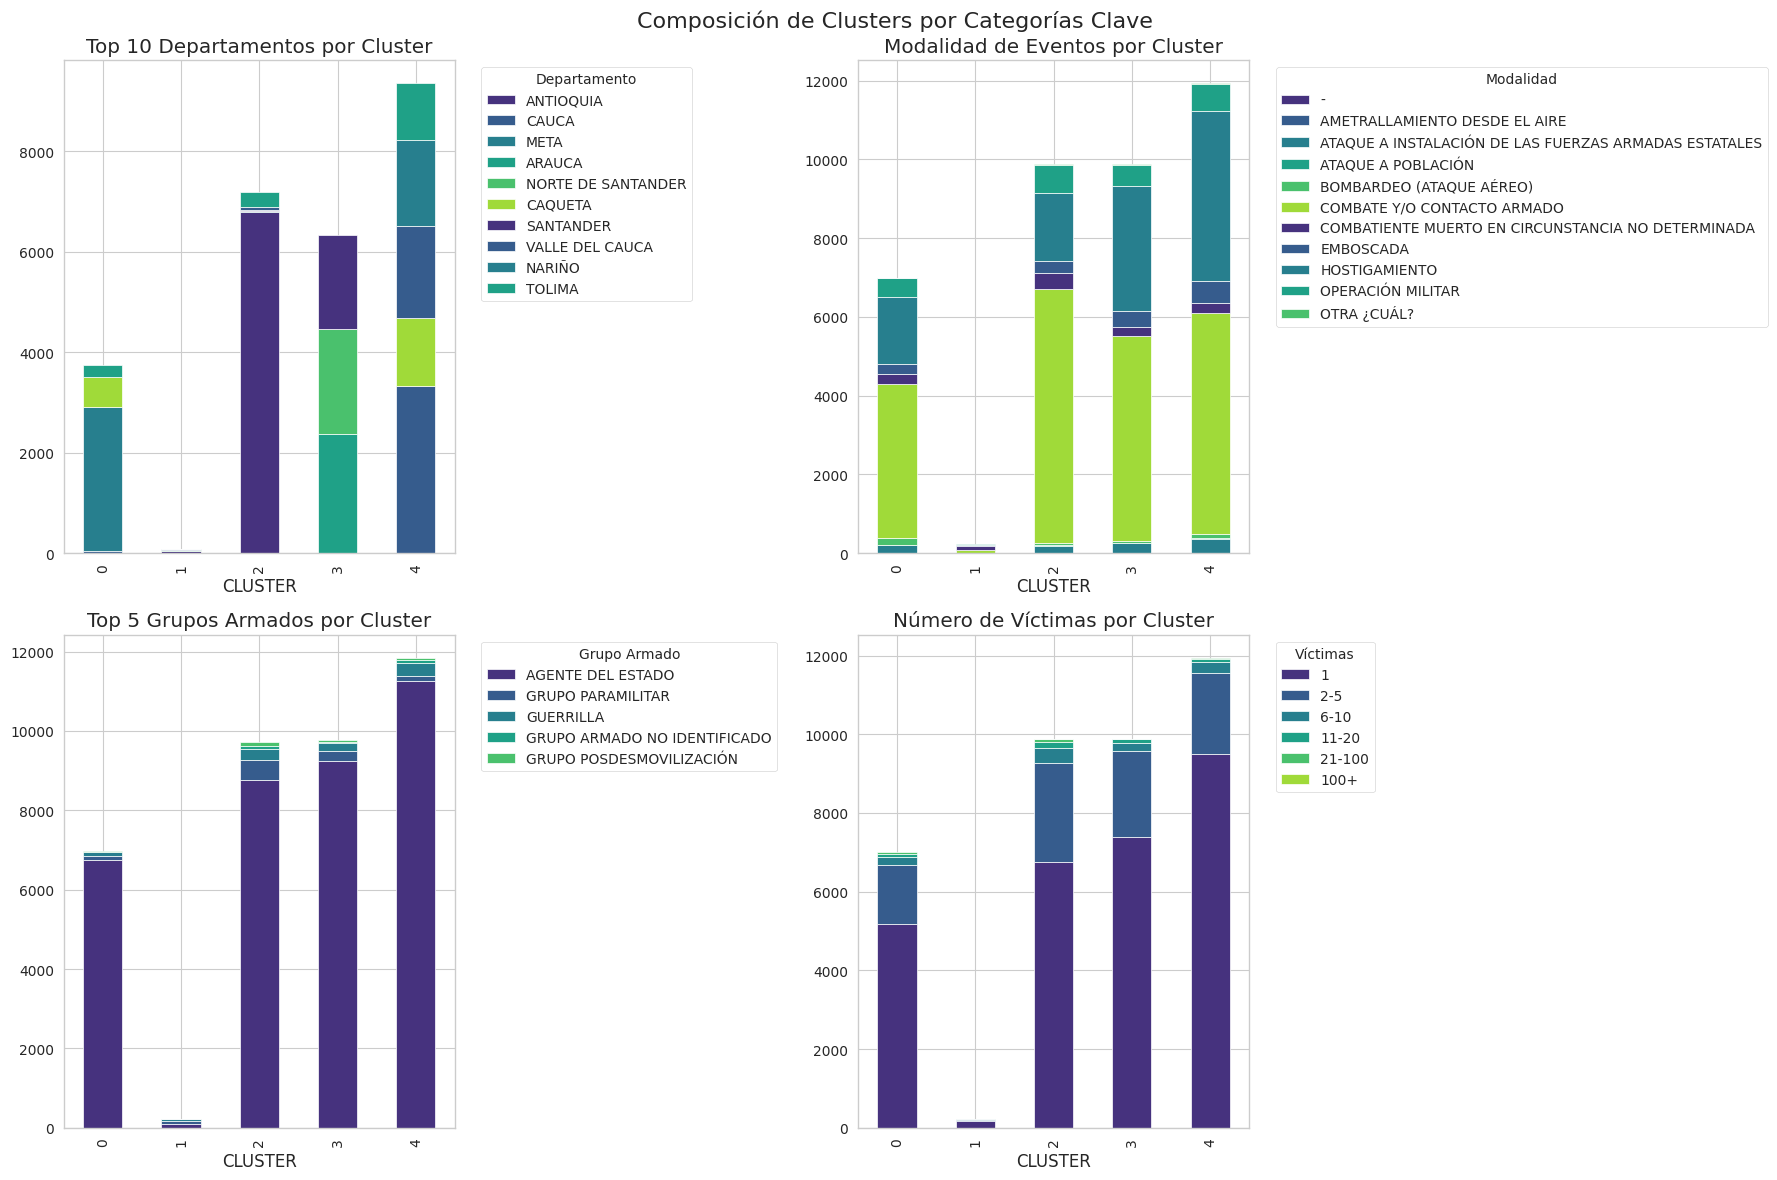

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy
import pandas as pd # Import pandas

def grafico_composicion_clusters(df):
    """
    Muestra la composición de cada cluster según diferentes categorías.
    """
    # Configurar el estilo usando seaborn function
    sns.set_style('whitegrid')
    plt.rcParams['figure.facecolor'] = 'white'

    # Crear figura con subgráficos
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Composición de Clusters por Categorías Clave', fontsize=16)

    # 1. Distribución por Departamento
    dept_counts = df.groupby(['CLUSTER', 'DEPARTAMENTO'], observed=True).size().unstack().fillna(0)
    top_depts = dept_counts.sum().sort_values(ascending=False).head(10).index
    dept_counts[top_depts].plot(kind='bar', stacked=True, ax=axes[0,0],
                              title='Top 10 Departamentos por Cluster')
    axes[0,0].legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 2. Distribución por Modalidad
    modal_counts = df.groupby(['CLUSTER', 'MODALIDAD'], observed=True).size().unstack().fillna(0)
    modal_counts.plot(kind='bar', stacked=True, ax=axes[0,1],
                    title='Modalidad de Eventos por Cluster')
    axes[0,1].legend(title='Modalidad', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 3. Distribución por Grupo Armado Principal
    grupo_counts = df.groupby(['CLUSTER', 'GRUPO_ARMADO_1'], observed=True).size().unstack().fillna(0)
    top_grupos = grupo_counts.sum().sort_values(ascending=False).head(5).index
    grupo_counts[top_grupos].plot(kind='bar', stacked=True, ax=axes[1,0],
                                title='Top 5 Grupos Armados por Cluster')
    axes[1,0].legend(title='Grupo Armado', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Distribución por Número de Víctimas (binned)
    # Ensure the column exists before creating 'VICTIMAS_BIN'
    if 'TOTAL_DE_VICTIMAS_DEL_CASO' in df.columns:
        df['VICTIMAS_BIN'] = pd.cut(df['TOTAL_DE_VICTIMAS_DEL_CASO'],
                                bins=[0, 1, 5, 10, 20, 100, 1000],
                                labels=['1', '2-5', '6-10', '11-20', '21-100', '100+'],
                                include_lowest=True) # Include the lowest value in the bins
        victim_counts = df.groupby(['CLUSTER', 'VICTIMAS_BIN'], observed=True).size().unstack().fillna(0)
        victim_counts.plot(kind='bar', stacked=True, ax=axes[1,1],
                         title='Número de Víctimas por Cluster')
        axes[1,1].legend(title='Víctimas', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print("Column 'TOTAL_DE_VICTIMAS_DEL_CASO' not found. Skipping victims distribution plot.")


    plt.tight_layout()
    plt.show()

# Assuming df_clusters is available from the previous clustering cell (hVZI1q-0Lj99)
if 'df_clusters' in locals() and df_clusters is not None:
    grafico_composicion_clusters(df_clusters)
else:
    print("df_clusters not found. Please run the clustering cell first.")

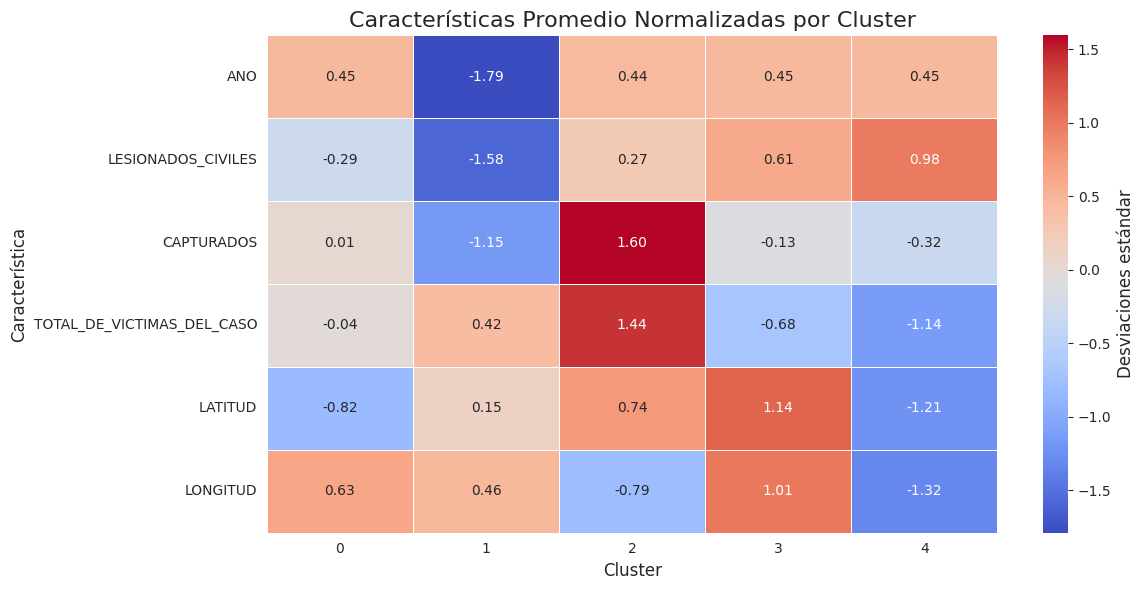

In [93]:
def heatmap_correlacion_clusters(df):
    """
    Muestra un heatmap de las características más importantes para cada cluster.
    """
    # Seleccionar características numéricas
    numeric_features = ['ANO', 'LESIONADOS_CIVILES', 'CAPTURADOS',
                       'TOTAL_DE_VICTIMAS_DEL_CASO', 'LATITUD', 'LONGITUD']

    # Calcular promedios por cluster
    cluster_means = df.groupby('CLUSTER')[numeric_features].mean()

    # Normalizar por columna para mejor visualización
    cluster_means_norm = (cluster_means - cluster_means.mean()) / cluster_means.std()

    # Crear heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_means_norm.T, cmap='coolwarm', annot=True, fmt='.2f',
               linewidths=.5, cbar_kws={'label': 'Desviaciones estándar'})

    plt.title('Características Promedio Normalizadas por Cluster', fontsize=16)
    plt.xlabel('Cluster')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

heatmap_correlacion_clusters(df_clusters)

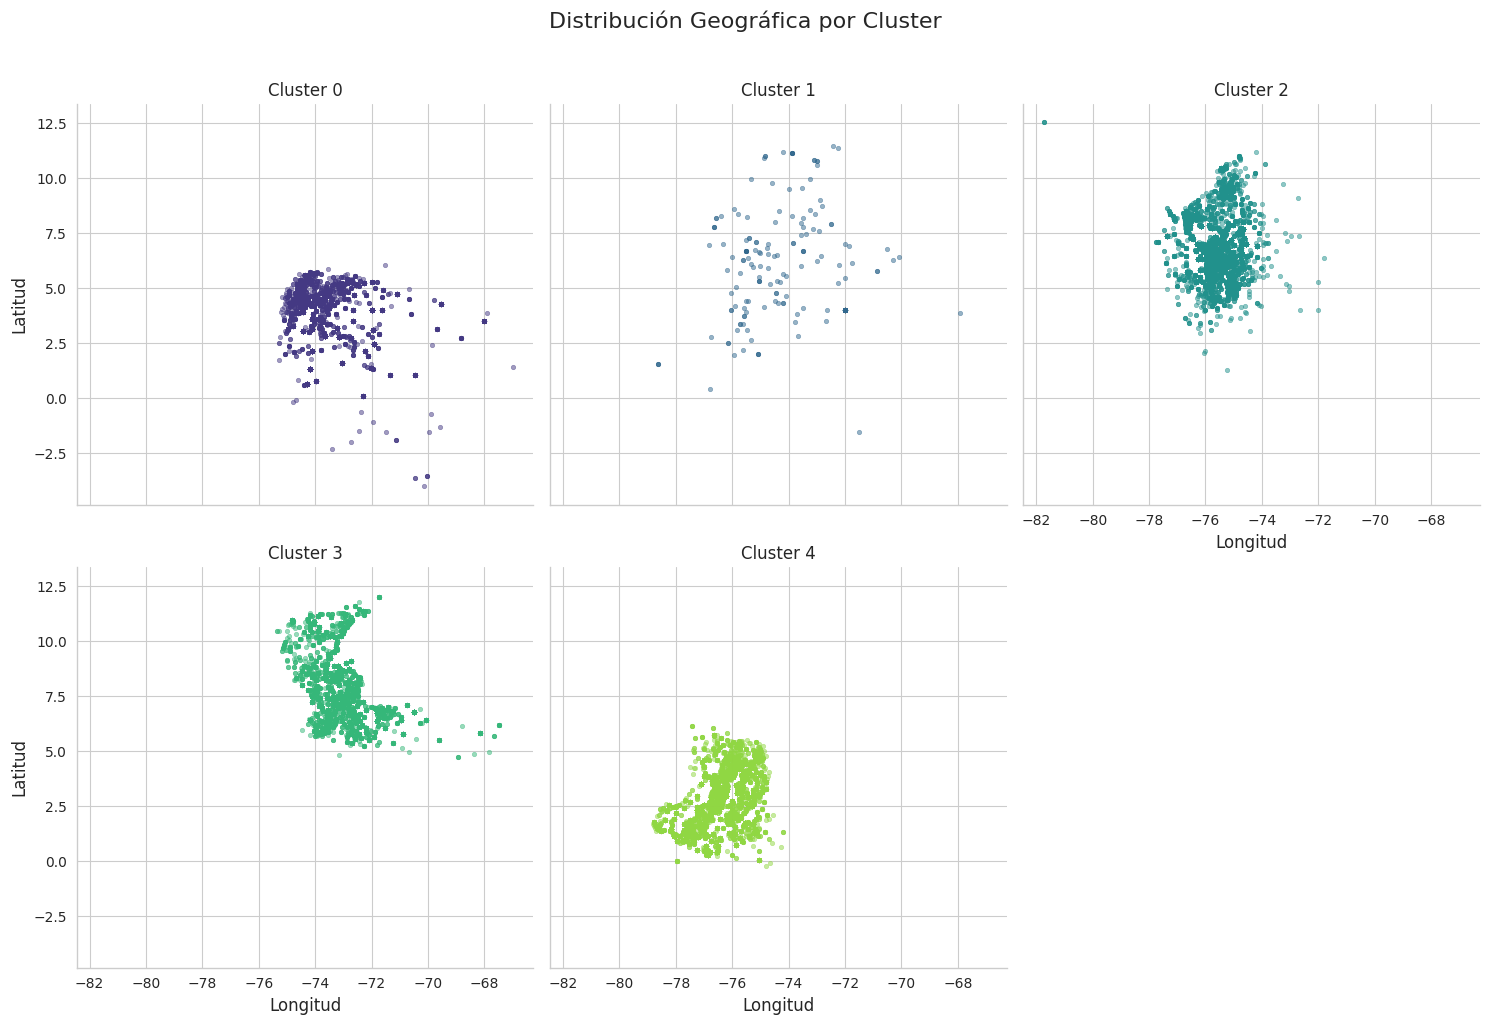

In [94]:
def mapa_facetado_clusters(df):
    """
    Crea una cuadrícula de mapas mostrando la distribución de cada cluster.
    """
    # Filtrar datos para visualización
    plot_data = df.dropna(subset=['LATITUD', 'LONGITUD', 'CLUSTER'])

    # Crear figura facetada
    g = sns.FacetGrid(plot_data, col='CLUSTER', col_wrap=3, height=5,
                     hue='CLUSTER', palette='viridis')

    # Añadir puntos al mapa base de Colombia
    g.map(plt.scatter, 'LONGITUD', 'LATITUD', alpha=0.5, s=10)

    # Configuraciones adicionales
    g.set_titles('Cluster {col_name}')
    g.set_axis_labels('Longitud', 'Latitud')
    plt.suptitle('Distribución Geográfica por Cluster', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

mapa_facetado_clusters(df_clusters)

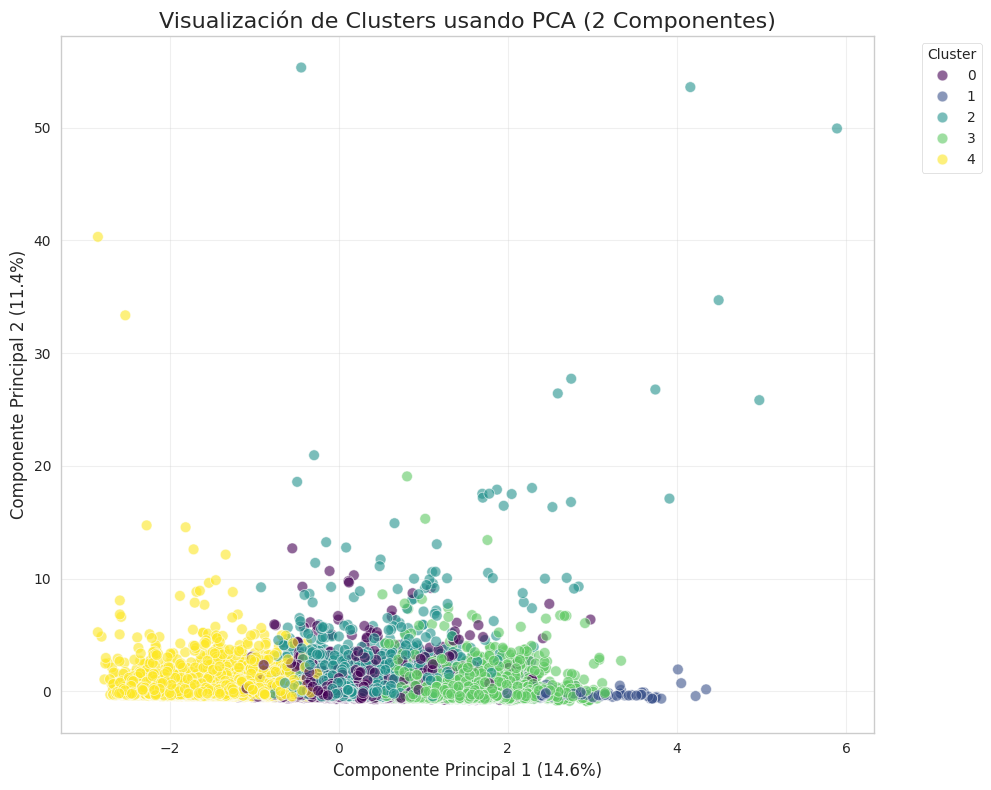

In [95]:
def visualizacion_pca(df, pipeline):
    """
    Visualiza los clusters en un espacio de 2D usando PCA.
    """
    # Obtener datos preprocesados
    preprocessed = pipeline.named_steps['preprocessor'].transform(
        preparar_datos_para_clustering(df))

    # Aplicar PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(preprocessed.toarray() if hasattr(preprocessed, 'toarray') else preprocessed)

    # Crear DataFrame para visualización
    pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
    pca_df['CLUSTER'] = df['CLUSTER'].values

    # Visualizar
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='CLUSTER',
                   palette='viridis', alpha=0.6, s=60)

    plt.title('Visualización de Clusters usando PCA (2 Componentes)', fontsize=16)
    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

visualizacion_pca(df_clusters, model)